About Data
10127 rows x 21 columns

###  7 categorical features

* Customer_id
* Attrition_Flag (1: Existing Customer, 0: Attrited Customer): The Customer leave or not
* Gender (1: Male, 0: Female)
* Education_Level (Graduate , High School, Unknown, Uneducated, College, * Post-Graduate, Doctorate)
* Marital_Status (Married, Single, Unknown, Divorced)
* Income_Category (Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, Unknown, 120K +) in dollar
* Card_Category (Blue, Silver, Gold, Platinum)

### 14 numerical features:

* Customer_Age: Customer's Age in Years
* Dependent_count: Number of dependents
* Months_on_book: Period of relationship with bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

# Import libraries

In [334]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library to split data 
from sklearn.model_selection import train_test_split


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [26]:
# import and mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [339]:
#Load data

bankchurners = pd.read_csv('/content/drive/Othercomputers/My Laptop/Enhance IT docs/project 4/BankChurners.csv')

In [340]:
bankchurners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [341]:
bankchurners.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [342]:
bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [95]:
bankchurners.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [96]:
percent_missing =bankchurners.isnull().sum() * 100 / len(bankchurners)
missing_value_df = pd.DataFrame({'number of missing rows': bankchurners.isnull().sum(),
                                 'percent_missing': percent_missing})

missing_value_df

,number of missing rows,percent_missing
CLIENTNUM,0,0.0
Attrition_Flag,0,0.0
Customer_Age,0,0.0
Gender,0,0.0
Dependent_count,0,0.0
Education_Level,0,0.0
Marital_Status,0,0.0
Income_Category,0,0.0
Card_Category,0,0.0
Months_on_book,0,0.0


In [97]:
bankchurners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [98]:
bankchurners._get_numeric_data()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [52]:
# # Droping CLIENTNUM columns because Client numberis unique identifier for the customer holding the account
# # So this number doesn't really effect our churn prediction.
# bankchurners.drop(['CLIENTNUM'], axis=1, inplace=True)

In [53]:
# All columns
cols = bankchurners.columns
# Find numerical columns
num_cols = bankchurners._get_numeric_data().columns
num_cols

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [124]:
# Categorical Columns
categorical = list(set(cols) - set(num_cols))
categorical

['Gender',
 'Income_Category',
 'Marital_Status',
 'Education_Level',
 'Attrition_Flag',
 'Card_Category']

In [125]:
categorical=['Card_Category',
 'Income_Category',
 'Marital_Status',
 'Education_Level']


In [126]:
bankchurners['Attrition_Flag']

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [131]:
# Plot categorical columns
def pltCountplot(cat, df):
    
    fig, axis = plt.subplots(len(cat) // 2, 2, figsize=(20,16))  

    index = 0
    sns.set()
    for i in range(len(cat) // 2):
            
        for j in range(2):

            ax = sns.countplot(cat[index], data=df, ax=axis[i][j], hue= 'Attrition_Flag');
        
            #for item in ax.get_xticklabels():
            #    item.set_rotation(15)

            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width(), height + 3, '{:1.2f}%'.format(height/len(df)*100), ha="center", fontsize=14) 
            
            index += 1

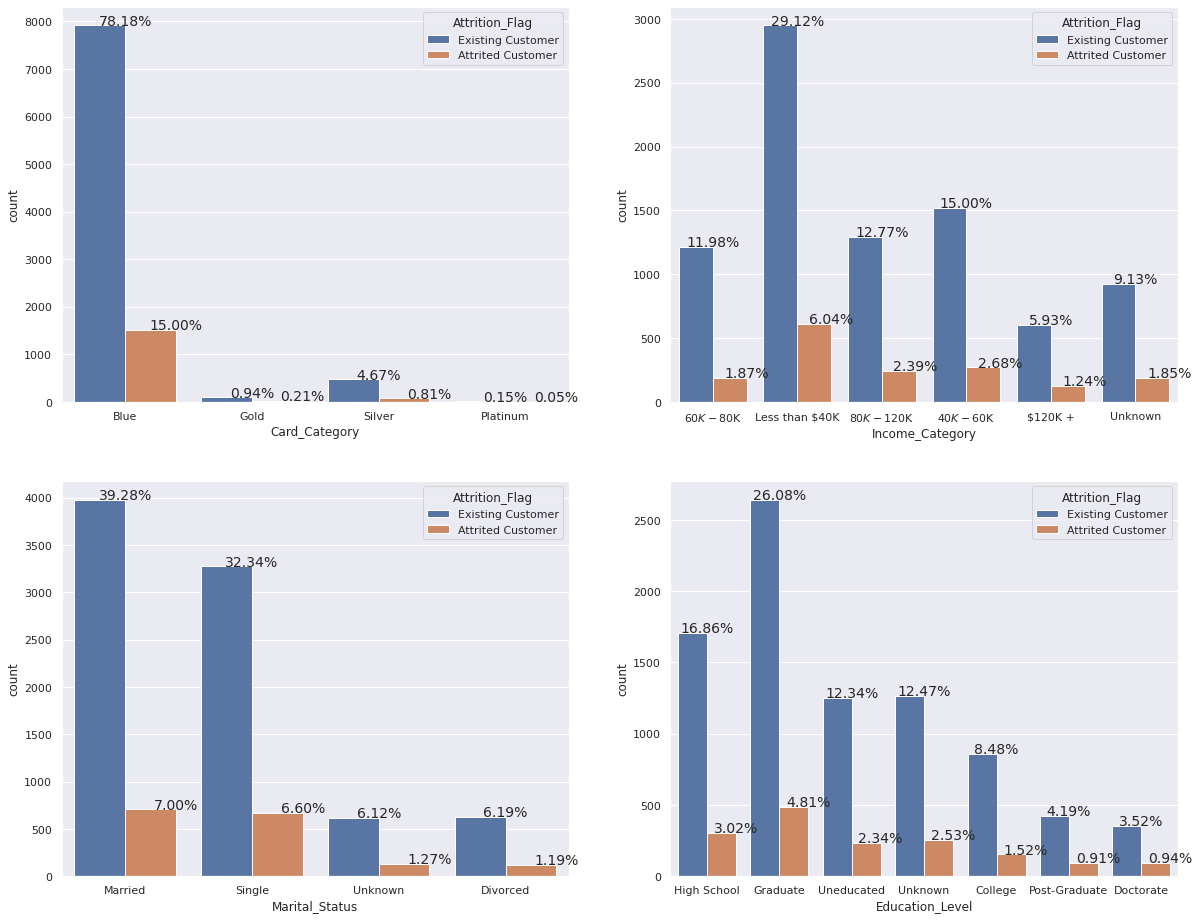

In [133]:
# Plot categorical columns
pltCountplot(categorical, bankchurners)
plt.savefig('bars.png')

In [ ]:
bankchurners['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

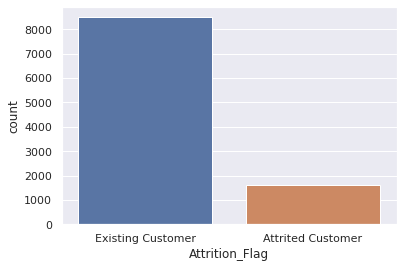

In [ ]:
# as we can see here, only 16.07% of customers who have churned.
sns.countplot('Attrition_Flag', data=bankchurners)

As we can see here, dataset is not equally distribute according to Attrition_Flag. Only 16.07% of customers who have churned among 10k clients.

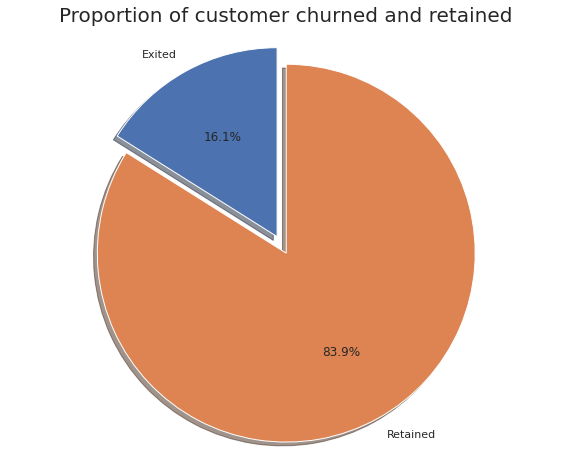

In [ ]:
labels = 'Exited', 'Retained'
sizes = [bankchurners.Attrition_Flag[bankchurners['Attrition_Flag']=='Attrited Customer'].count(), bankchurners.Attrition_Flag[bankchurners['Attrition_Flag']=='Existing Customer' ].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.savefig('piecorrect.png')
plt.show()

In [ ]:
bankchurners['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
# Plot categorical columns with different y
def pltcrosstab(cat, df):
    
    fig, axis = plt.subplots((len(cat) // 3), 3, figsize=(16,8))  
    fig.tight_layout()

    index = 0
    sns.set()
    for i in range((len(cat) // 3)):
            
        for j in range(3):
            
            # Since we have 11 numerical columns, some plots will be empty
            if index == len(cat):
                break
            
            ax = pd.crosstab(df[cat[index]], df['Attrition_Flag']).plot(kind='bar', ax=axis[i][j])
        
            for item in ax.get_xticklabels():
                item.set_rotation(20)

            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width(), height + 3, '{:1.2f}%'.format(height/len(df)*100), ha="center", fontsize=8) 
            
            index += 1
            
    plt.subplots_adjust(wspace=0.2, hspace=0.4)

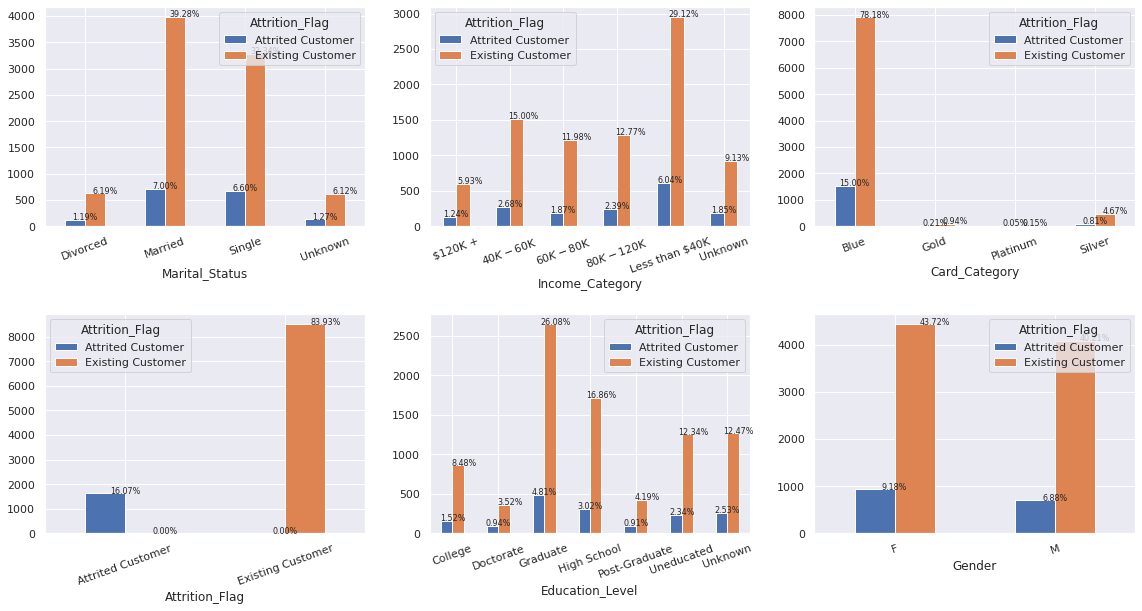

In [ ]:
# Plot categorical columns with different Attrition_Flag
pltcrosstab(categorical, bankchurners);

We can see in above plots, with different attrention_flag, how our categorical values change and also can see in which categiries we seeing churning customers the most.

* %93.17 of churned clients have Blue card
* %35.15 of churned clients have less than $40K
* %46.28 of churned clients are married
* %30.88 of churned clients have graduate education level

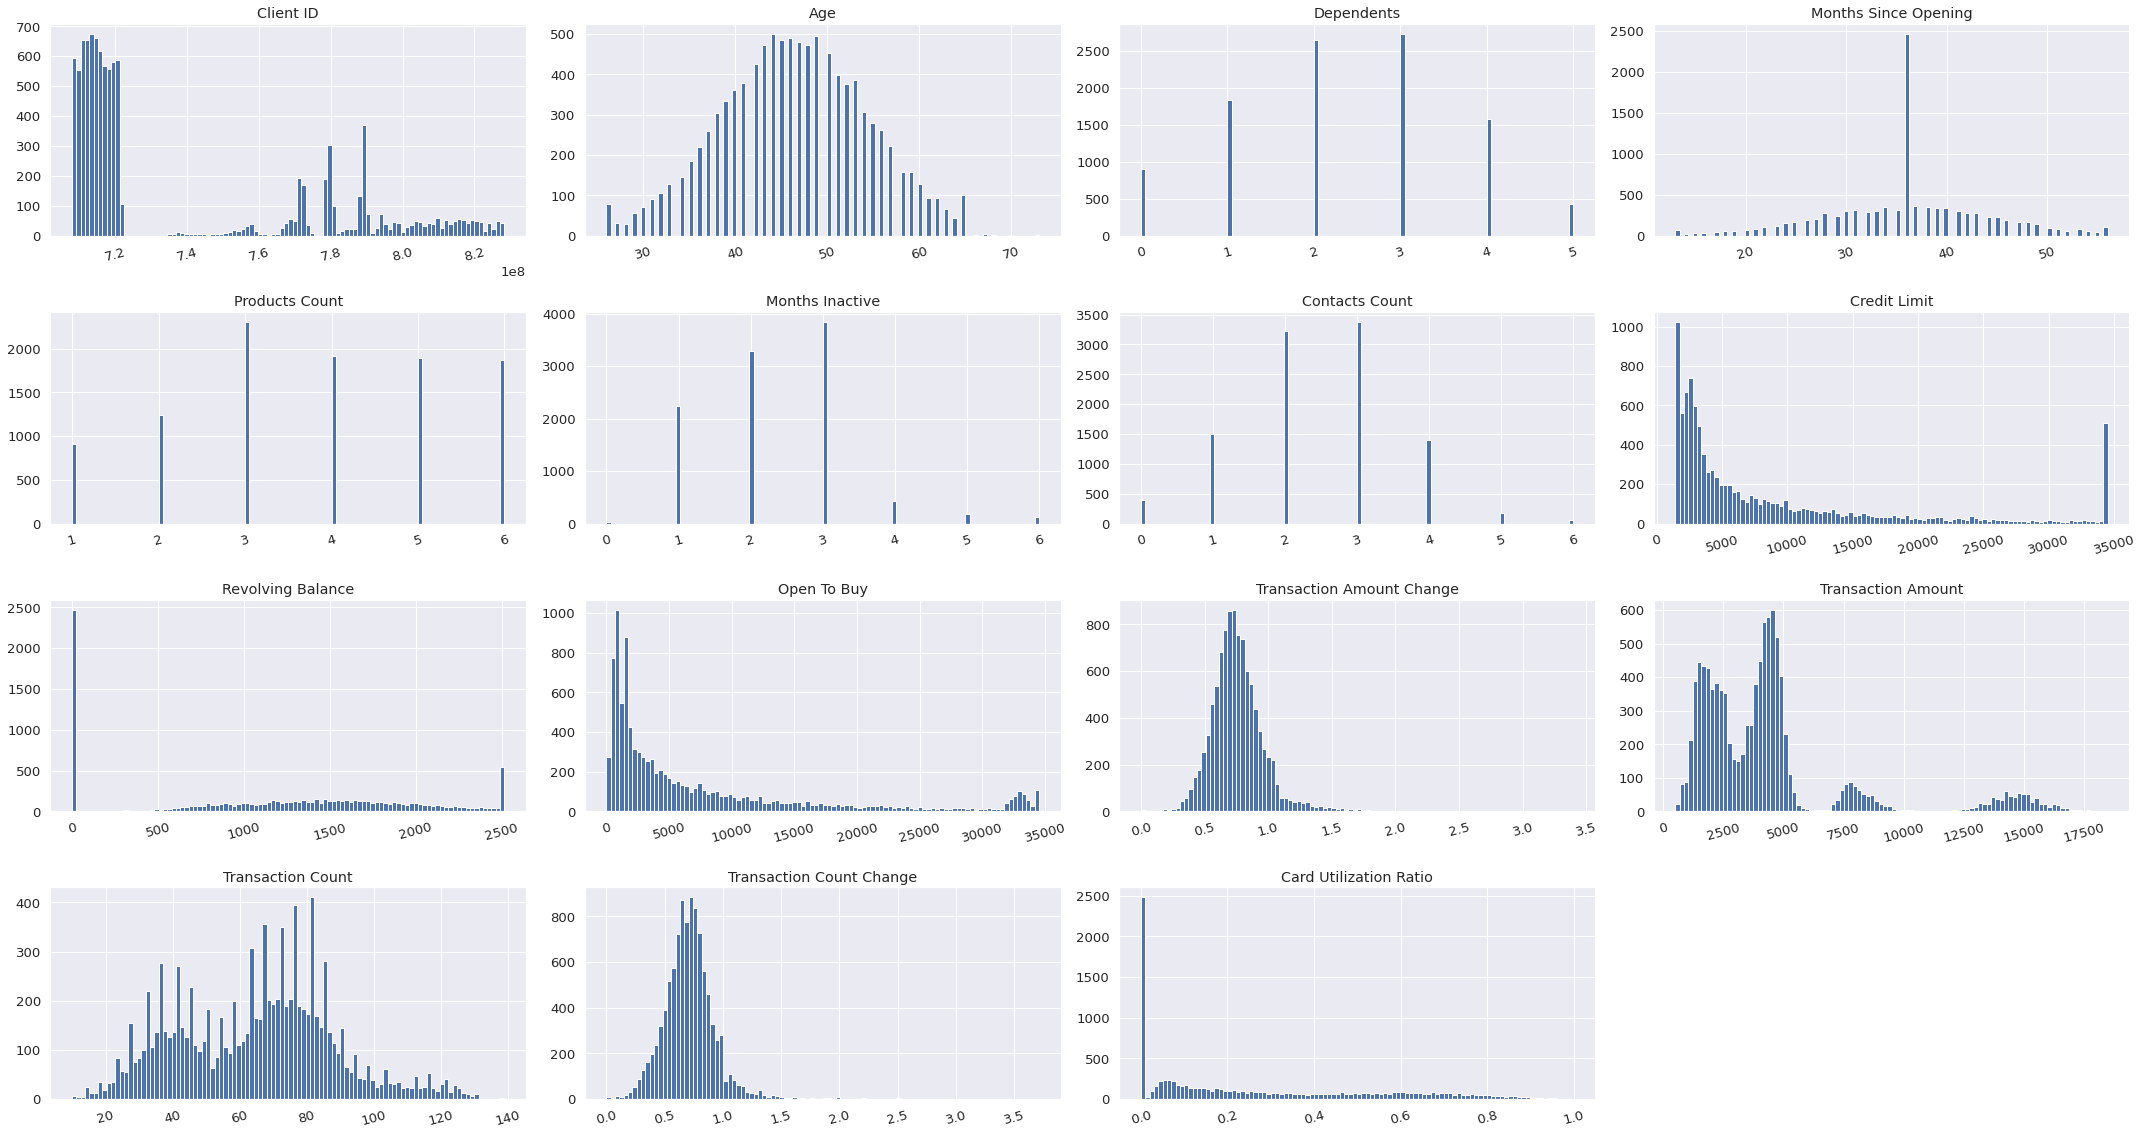

In [337]:
# Check distribution of numerical features
bankchurners.hist(figsize=(30,16), xrot=15, bins=int(bankchurners.shape[0]**0.5))
plt.savefig('distro.png')

In [ ]:
from scipy.stats import norm
def plotDistPlot(df, columns):
    fig, ax = plt.subplots(len(columns)//3, 3,figsize=(20, 12))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.distplot(df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

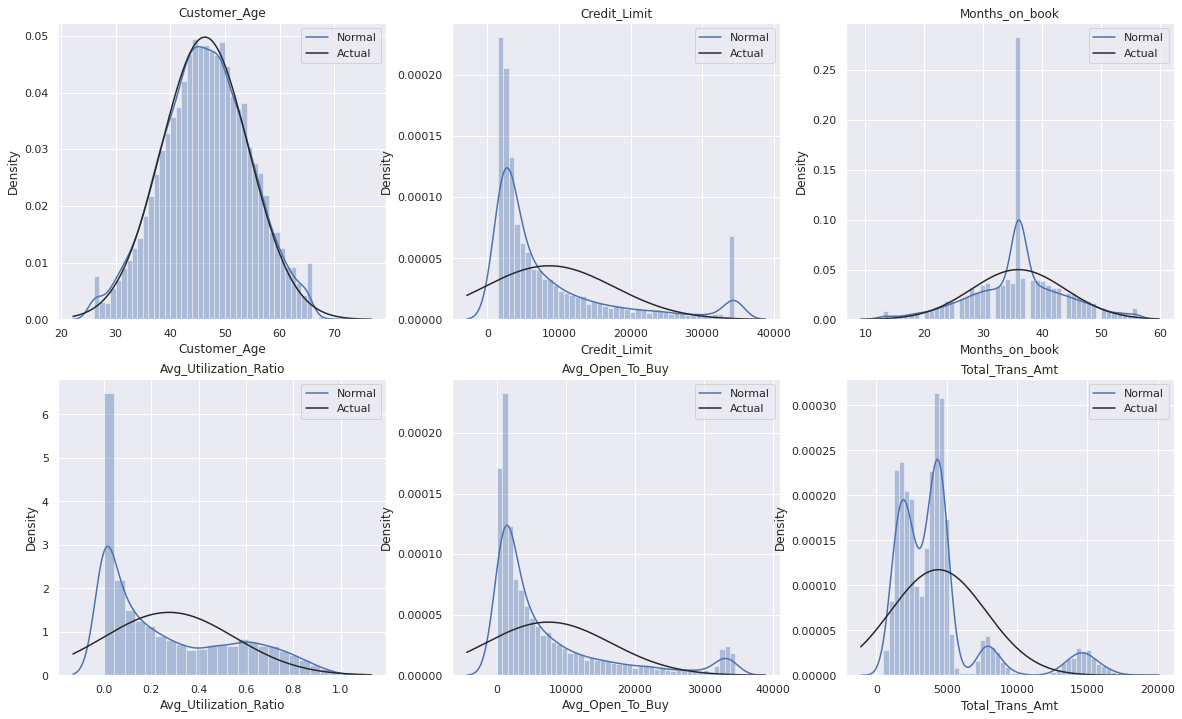

In [ ]:
some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']
plotDistPlot(bankchurners, some_columns)

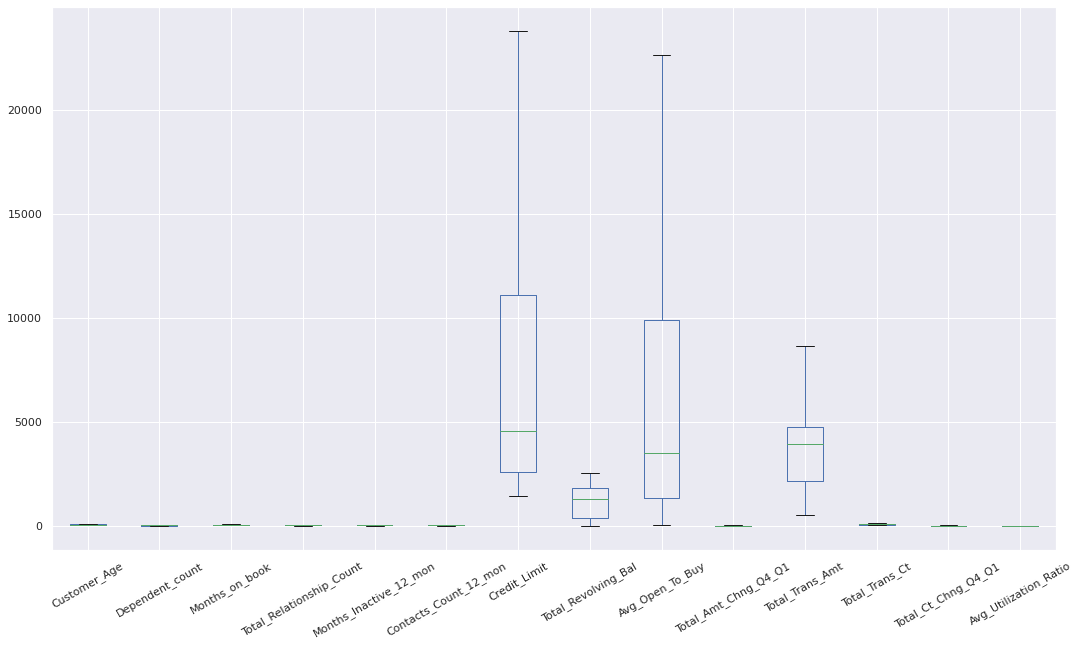

In [ ]:
bankchurners.plot(kind='box', figsize = (18,10), rot=30, showfliers=False);

In [ ]:
# Check distribution of numerical features
sns.pairplot(bankchurners, hue='Attrition_Flag', height=2.5)

Output hidden; open in https://colab.research.google.com to view.

Here we can see all numerical columns and Attrition_Flag distribution

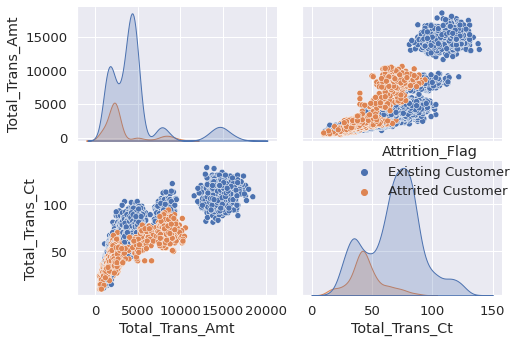

In [343]:
sns.pairplot(bankchurners, vars=['Total_Trans_Amt','Total_Trans_Ct'], hue='Attrition_Flag', height=2.5)
plt.savefig('segments.png')

This one is interesting that found in above pairplot of numerical columns, people who churned from credit card service, had less transaction count and transaction amount!

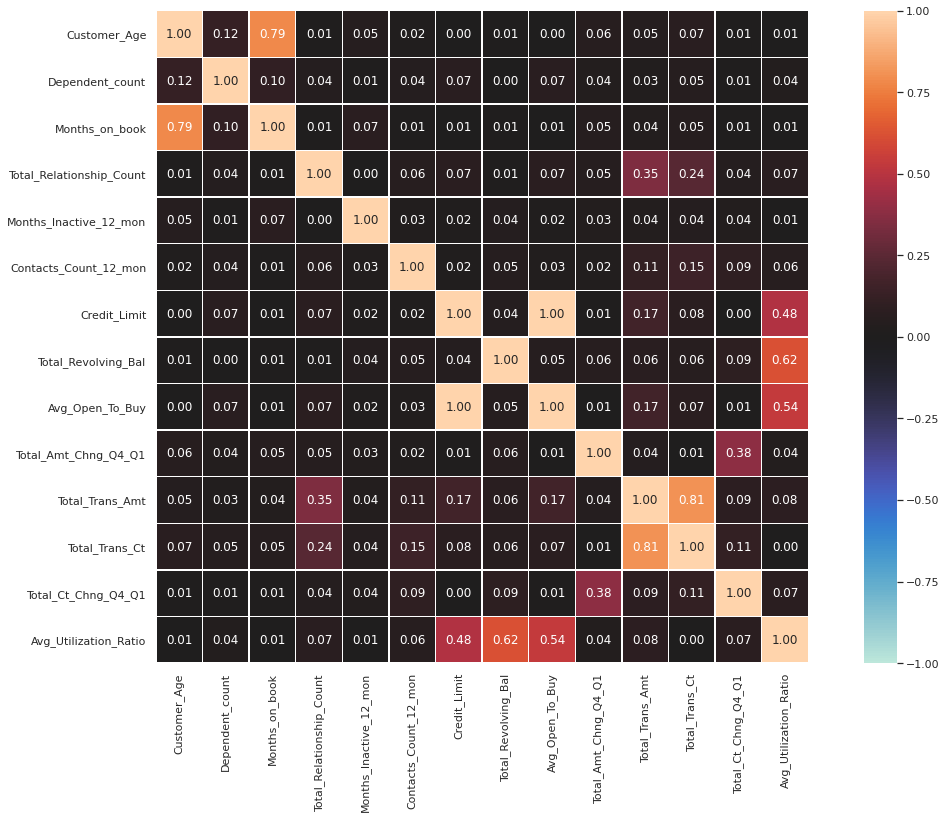

In [ ]:
num_cols = bankchurners._get_numeric_data().columns
corr_data = bankchurners.loc[:, num_cols].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), vmin=-1.0, vmax=1.0, linewidths=0.5, cmap='icefire', annot=True, fmt='.2f', square= 'True')
plt.show()

Months_on_book seems like correlated with Customer_Age .

Total Transaction Count is correlated with Total Transaction Amount.

## Dealing With Missing Data

Existing Customers With Missing Data

In [321]:
cdata=bankchurners

In [322]:
cdata.columns = [
                 'Client ID','Status','Age','Gender','Dependents','Education','Marital Status','Income','Card Type','Months Since Opening',
                 'Products Count','Months Inactive','Contacts Count','Credit Limit','Revolving Balance','Open To Buy','Transaction Amount Change',
                 'Transaction Amount','Transaction Count','Transaction Count Change','Card Utilization Ratio'
                 ]

In [323]:
unknown_data_customers = cdata[
                               (cdata['Education'] == 'Unknown') |
                               (cdata['Marital Status'] == 'Unknown') |
                               (cdata['Income'] == 'Unknown')
                              ]

print('Number of customers with some form of missing data:', len(unknown_data_customers))
print('Percentage:', round(len(unknown_data_customers) * 100 / len(cdata), 2))

Number of customers with some form of missing data: 3046
Percentage: 30.08


This is quite a large portion of our dataset. Let's see how our existing and attriting customers are represented within this subgroup.

In [324]:
# Finding the number of customers within this subgroup who have attrited accounts
num_unknown_attriting = len(unknown_data_customers[unknown_data_customers['Status'] == 'Attrited Customer'])
num_unknown_existing = len(unknown_data_customers[unknown_data_customers['Status'] == 'Existing Customer'])

print('Number of attriting customers within:', num_unknown_attriting)
print( 'Percentage within customers with unknown data:', round(num_unknown_attriting * 100 / len(unknown_data_customers), 2) )

Number of attriting customers within: 514
Percentage within customers with unknown data: 16.87


the subgroup with some kind of missing data follows the general population in terms of attrition rate, right around 16%. Since we need to balance our dataset anyways, let's see what happens to our dataset if we hypothetically drop all Existing customers who have some kind of unknown data while keeping the under-represented Attrited group:

In [325]:
print('ORIGINAL DATA *******************')
print('Number of Existing:', 
      sum(cdata['Status'] == 'Existing Customer'),
      '({}%)'.format( round(sum(cdata['Status'] == 'Existing Customer') * 100 / len(cdata), 2) )
      )
print('Number of Attriting:', 
      sum(cdata['Status'] == 'Attrited Customer'),
      '({}%)'.format( round(sum(cdata['Status'] == 'Attrited Customer') * 100 / len(cdata), 2) )
      )

print()

print('HYPOTHETICAL DROP DATA **********')
print('Number of Existing:', 
      sum(cdata['Status'] == 'Existing Customer') - num_unknown_existing,
      '({}%)'.format( round((sum(cdata['Status'] == 'Existing Customer') - num_unknown_existing) * 100 / (len(cdata) - num_unknown_existing), 2) )
      )
print('Number of Attriting:', 
      sum(cdata['Status'] == 'Attrited Customer'),
      '({}%)'.format( round(sum(cdata['Status'] == 'Attrited Customer') * 100 / (len(cdata) - num_unknown_existing), 2) )
      )

ORIGINAL DATA *******************
Number of Existing: 8500 (83.93%)
Number of Attriting: 1627 (16.07%)

HYPOTHETICAL DROP DATA **********
Number of Existing: 5968 (78.58%)
Number of Attriting: 1627 (21.42%)


In [326]:
df=cdata

In [327]:
df.Status.value_counts()


Existing Customer    8500
Attrited Customer    1627
Name: Status, dtype: int64

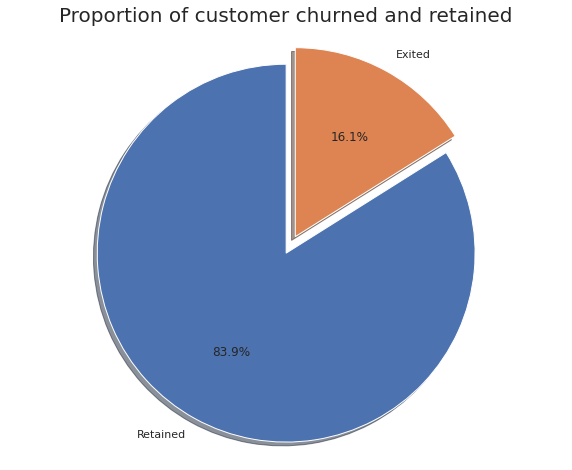

In [82]:
labels =  'Retained','Exited'
sizes = [df.Status[df['Status']=='Existing Customer'].count(), df.Status[df['Status']=='Attrited Customer'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.savefig('piechart.png')
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

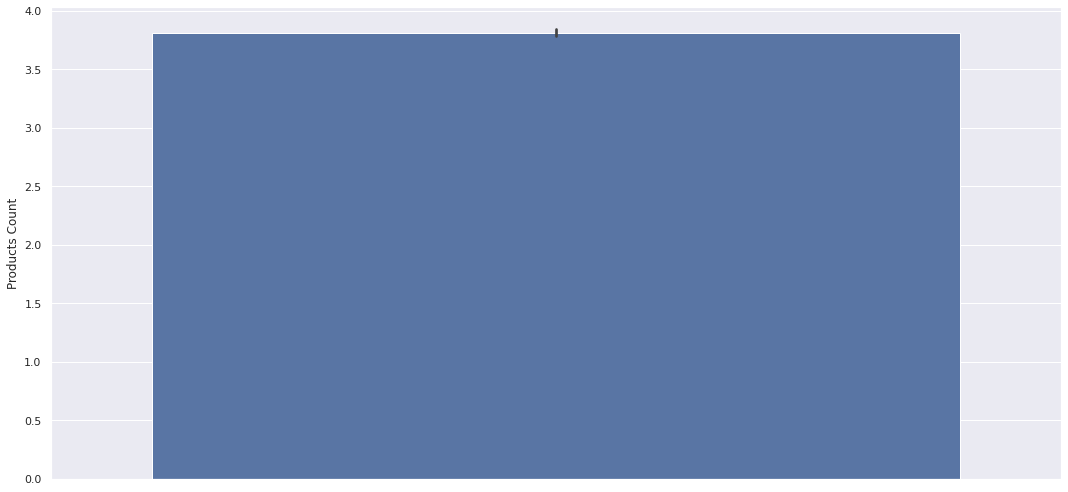

In [332]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(y="Products Count", hue='Status', data=cdata)

In [149]:
numerical = cdata.describe().columns
categorical = cdata.drop(cdata.describe().columns, axis=1).columns

In [84]:
categorical

Index(['Status', 'Gender', 'Education', 'Marital Status', 'Income',
       'Card Type'],
      dtype='object')

In [85]:
for col in categorical:
  print(round(cdata[col].value_counts(normalize=True), 4) * 100)
  print()

Existing Customer    83.93
Attrited Customer    16.07
Name: Status, dtype: float64

F    52.91
M    47.09
Name: Gender, dtype: float64

Graduate         30.89
High School      19.88
Unknown          15.00
Uneducated       14.68
College          10.00
Post-Graduate     5.10
Doctorate         4.45
Name: Education, dtype: float64

Married     46.28
Single      38.94
Unknown      7.40
Divorced     7.39
Name: Marital Status, dtype: float64

Less than $40K    35.16
$40K - $60K       17.68
$80K - $120K      15.16
$60K - $80K       13.84
Unknown           10.98
$120K +            7.18
Name: Income, dtype: float64

Blue        93.18
Silver       5.48
Gold         1.15
Platinum     0.20
Name: Card Type, dtype: float64



In [69]:
# to_drop = unknown_data_customers[unknown_data_customers['Status'] == 'Existing Customer'].index
# cdata.drop(to_drop, inplace=True)

# # A new look at our distributions with majority unknowns dropped
# for col in categorical:
#   print(round(cdata[col].value_counts(normalize=True), 4) * 100)
#   print()

Existing Customer    78.58
Attrited Customer    21.42
Name: Status, dtype: float64

M    50.9
F    49.1
Name: Gender, dtype: float64

Graduate         35.18
High School      22.67
Uneducated       16.52
College          11.40
Post-Graduate     5.87
Doctorate         4.98
Unknown           3.37
Name: Education, dtype: float64

Married     49.30
Single      41.13
Divorced     7.87
Unknown      1.70
Name: Marital Status, dtype: float64

Less than $40K    38.59
$40K - $60K       19.47
$80K - $120K      16.52
$60K - $80K       15.10
$120K +            7.85
Unknown            2.46
Name: Income, dtype: float64

Blue        93.26
Silver       5.40
Gold         1.17
Platinum     0.17
Name: Card Type, dtype: float64



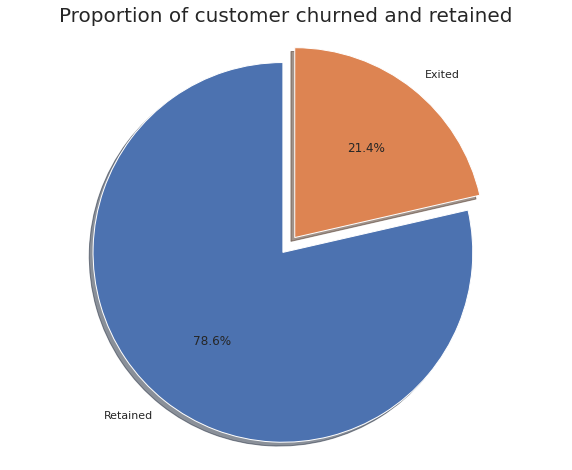

In [71]:
labels =  'Retained','Exited'
sizes = [cdata.Status[cdata['Status']=='Existing Customer'].count(), cdata.Status[cdata['Status']=='Attrited Customer'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.savefig('piechart.png')
plt.show()


### Attriting Customers With Missing Data

We will use K-Nearset-Neighbors Imputation. Prep data for KNN Imputer:


In [141]:
# Drop Client ID because it is an identification column, and drop Status because all of our missing customers are attriting (1:1 correlation)
idata = cdata.drop(['Client ID', 'Status'], axis=1)

# Save our target variable to reattach later
target = cdata['Status']

# Replace categories with numerical values for the KNN Imputer
idata['Education'].replace({'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}, inplace=True)
idata['Marital Status'].replace({'Single': 1, 'Married': 2, 'Divorced' :3}, inplace=True)
idata['Income'].replace({'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}, inplace=True)
idata['Card Type'].replace({'Blue' : 1, 'Silver' : 2, 'Gold' : 3, 'Platinum' : 4}, inplace=True)
idata['Gender'].replace({'M' : 1, 'F' : 0}, inplace=True)

idata.head()

,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount Change,Transaction Amount,Transaction Count,Transaction Count Change,Card Utilization Ratio
0,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,2,Unknown,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [142]:
# Dropping strictly for KNN Imputer reasons, to avoid rounding of these ratios
knn_data = idata.drop(['Transaction Amount Change', 'Transaction Count Change', 'Card Utilization Ratio'], axis=1)

# Save ratios to reattach after KNN Imputation
amt_change = idata['Transaction Amount Change']
cnt_change = idata['Transaction Count Change']
c_util_ratio = idata['Card Utilization Ratio']

knn_data.head()

,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount,Transaction Count
0,45,1,3,2,2,3,1,39,5,1,3,12691.0,777,11914.0,1144,42
1,49,0,5,4,1,1,1,44,6,1,2,8256.0,864,7392.0,1291,33
2,51,1,3,4,2,4,1,36,4,1,0,3418.0,0,3418.0,1887,20
3,40,0,4,2,Unknown,1,1,34,3,4,1,3313.0,2517,796.0,1171,20
4,40,1,3,1,2,3,1,21,5,1,0,4716.0,0,4716.0,816,28


In [143]:
# Replace Unknowns with Null Values for KNN Imputer
knn_data.replace({'Education': {'Unknown': None},
                  'Marital Status': {'Unknown': None},
                  'Income': {'Unknown': None}
                  }, inplace=True)
knn_data.isnull().sum()

Age                        0
Gender                     0
Dependents                 0
Education               1519
Marital Status           749
Income                  1112
Card Type                  0
Months Since Opening       0
Products Count             0
Months Inactive            0
Contacts Count             0
Credit Limit               0
Revolving Balance          0
Open To Buy                0
Transaction Amount         0
Transaction Count          0
dtype: int64

In [144]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=43)
knn_data = pd.DataFrame(np.round(imputer.fit_transform(knn_data)), columns=knn_data.columns)

knn_data.head()

,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount,Transaction Count
0,45.0,1.0,3.0,2.0,2.0,3.0,1.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1144.0,42.0
1,49.0,0.0,5.0,4.0,1.0,1.0,1.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1291.0,33.0
2,51.0,1.0,3.0,4.0,2.0,4.0,1.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,1887.0,20.0
3,40.0,0.0,4.0,2.0,2.0,1.0,1.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1171.0,20.0
4,40.0,1.0,3.0,1.0,2.0,3.0,1.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,816.0,28.0


In [145]:
# Rejoin the newly imputed data with the ratio columns dropped for imputation purposes
knn_data['Transaction Amount Change'] = list(amt_change)
knn_data['Transaction Count Change'] = list(cnt_change)
knn_data['Card Utilization Ratio'] = list(c_util_ratio)

# Rejoin the Status target variable
knn_data['Status'] = list(target)

knn_data.head()

,Age,Gender,Dependents,Education,Marital Status,Income,Card Type,Months Since Opening,Products Count,Months Inactive,Contacts Count,Credit Limit,Revolving Balance,Open To Buy,Transaction Amount,Transaction Count,Transaction Amount Change,Transaction Count Change,Card Utilization Ratio,Status
0,45.0,1.0,3.0,2.0,2.0,3.0,1.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1144.0,42.0,1.335,1.625,0.061,Existing Customer
1,49.0,0.0,5.0,4.0,1.0,1.0,1.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1291.0,33.0,1.541,3.714,0.105,Existing Customer
2,51.0,1.0,3.0,4.0,2.0,4.0,1.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,1887.0,20.0,2.594,2.333,0.000,Existing Customer
3,40.0,0.0,4.0,2.0,2.0,1.0,1.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1171.0,20.0,1.405,2.333,0.760,Existing Customer
4,40.0,1.0,3.0,1.0,2.0,3.0,1.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,816.0,28.0,2.175,2.500,0.000,Existing Customer


In [146]:
knn_data.isnull().sum()

Age                          0
Gender                       0
Dependents                   0
Education                    0
Marital Status               0
Income                       0
Card Type                    0
Months Since Opening         0
Products Count               0
Months Inactive              0
Contacts Count               0
Credit Limit                 0
Revolving Balance            0
Open To Buy                  0
Transaction Amount           0
Transaction Count            0
Transaction Amount Change    0
Transaction Count Change     0
Card Utilization Ratio       0
Status                       0
dtype: int64

In [147]:
knn_data['Status'].replace({'Existing Customer' : 0, 'Attrited Customer' : 1}, inplace=True)

### New Categorical Distributions

In [150]:
for col in categorical:
  print(round(knn_data[col].value_counts(normalize=True), 4) * 100)
  print()

0    83.93
1    16.07
Name: Status, dtype: float64

0.0    52.91
1.0    47.09
Name: Gender, dtype: float64

4.0    31.20
3.0    24.60
2.0    19.97
1.0    14.68
5.0     5.10
6.0     4.45
Name: Education, dtype: float64

2.0    53.10
1.0    39.52
3.0     7.39
Name: Marital Status, dtype: float64

1.0    36.27
2.0    22.73
3.0    16.98
4.0    16.82
5.0     7.20
Name: Income, dtype: float64

1.0    93.18
2.0     5.48
3.0     1.15
4.0     0.20
Name: Card Type, dtype: float64



In [ ]:
knn_data[categorical]

,Status,Gender,Education,Marital Status,Income,Card Type
0,0,1.0,2.0,2.0,3.0,1.0
1,0,0.0,4.0,1.0,1.0,1.0
2,0,1.0,4.0,2.0,4.0,1.0
3,0,1.0,1.0,2.0,3.0,1.0
4,0,1.0,4.0,2.0,2.0,1.0
...,...,...,...,...,...,...
7590,0,1.0,4.0,1.0,2.0,1.0
7591,1,1.0,3.0,3.0,2.0,1.0
7592,1,0.0,2.0,2.0,1.0,1.0
7593,1,1.0,4.0,2.0,2.0,1.0


We can see that our KNN Imputer did a good job of separating the Unknown values into different bins. The new distribution is much better than one we would have obtained using simple mean or mode imputation.

## Numerical Univariate Analysis

In [152]:
numerical_small = knn_data[['Dependents', 'Products Count', 'Months Inactive', 'Contacts Count']]
numerical_large = knn_data[['Age', 'Months Since Opening', 'Credit Limit', 'Revolving Balance', 'Open To Buy', 'Transaction Amount', 'Transaction Count']]
numerical_ratio = knn_data[['Transaction Amount Change', 'Transaction Count Change', 'Card Utilization Ratio']]

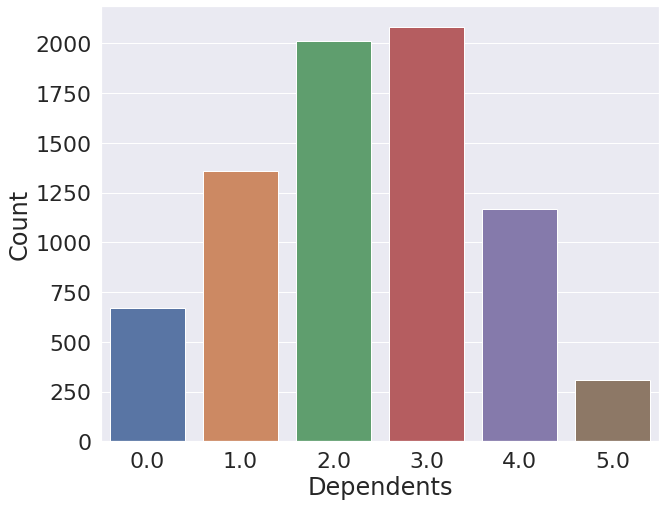

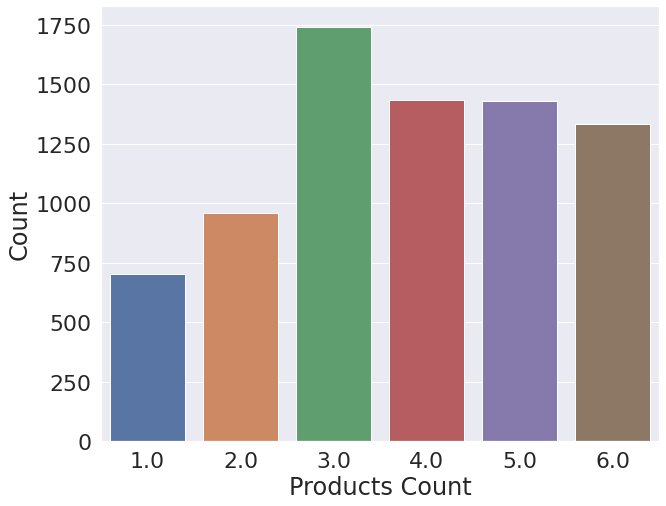

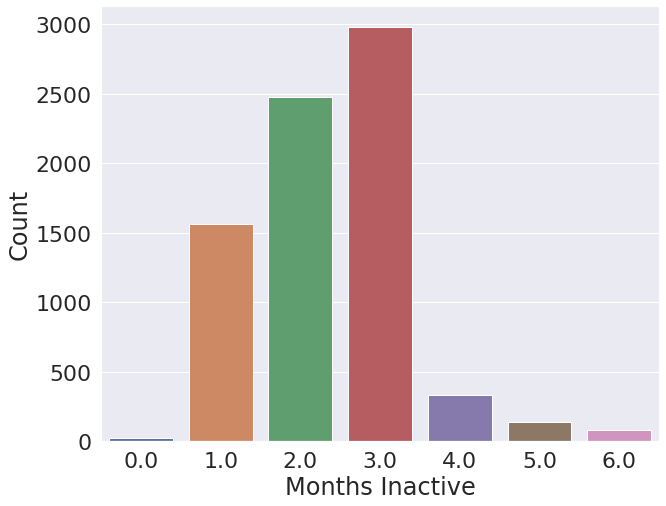

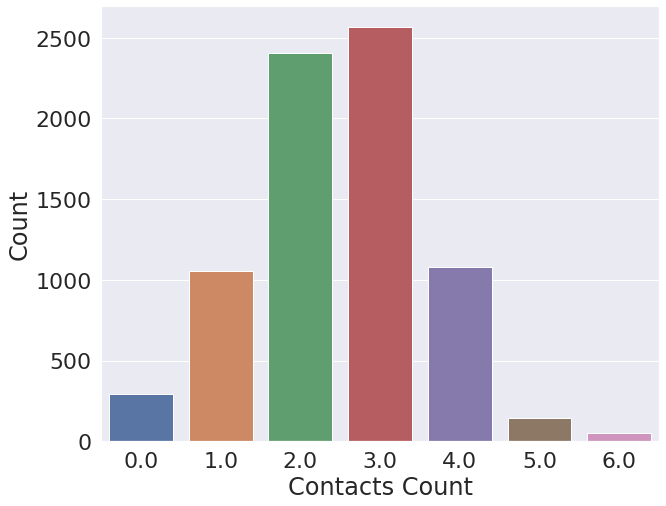

In [ ]:
sns.set(font_scale=2)
for col in numerical_small:
  plt.figure(figsize=(10,8))
  sns.countplot(knn_data[col])
  plt.ylabel('Count')
  plt.show();
  print()

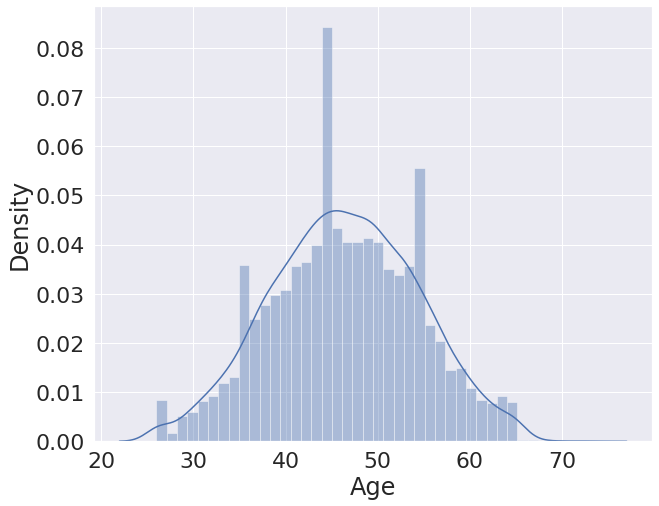

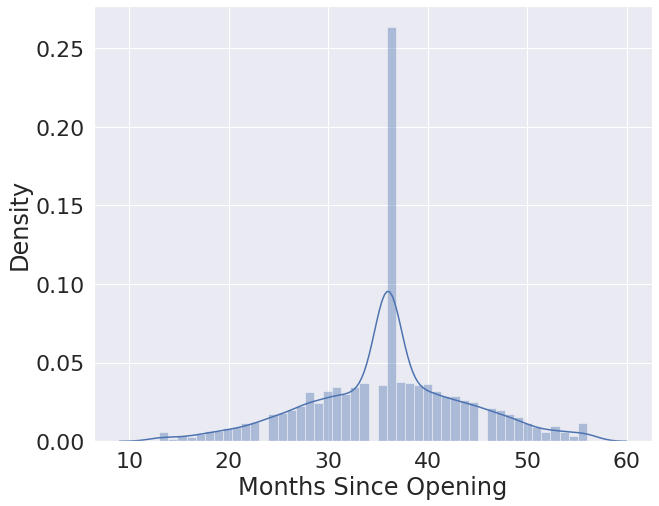

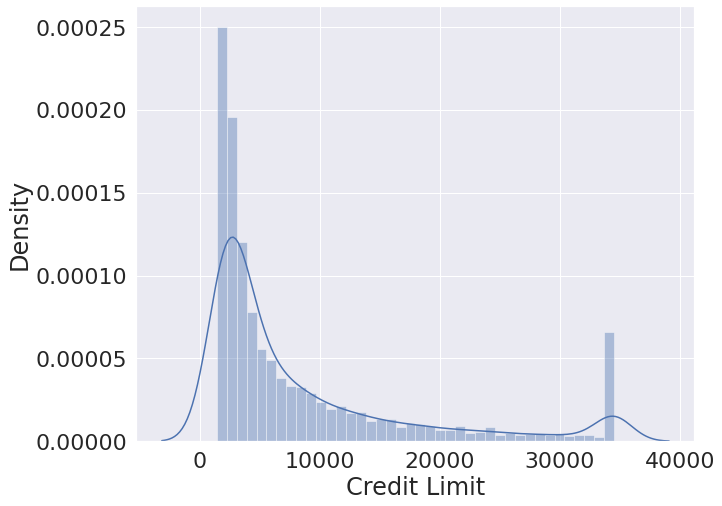

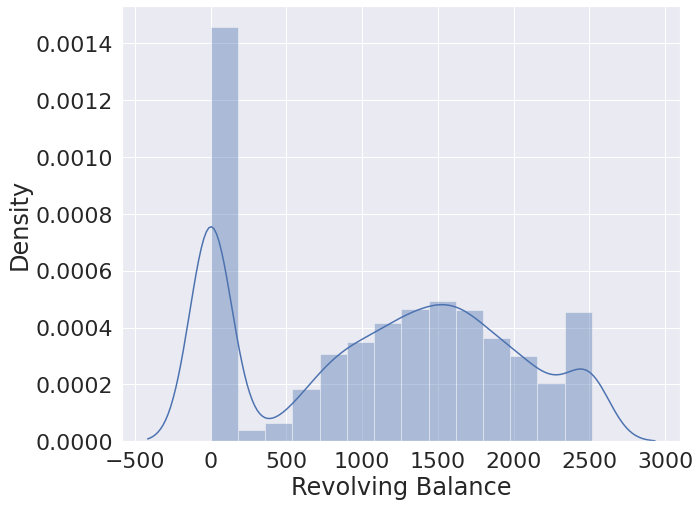

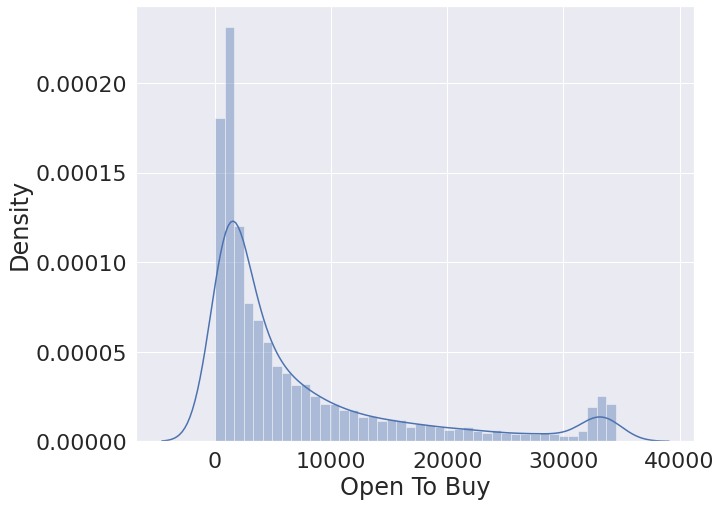

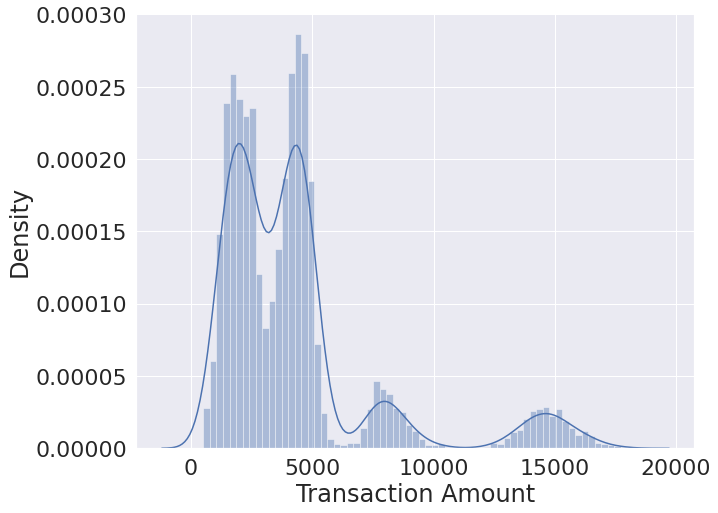

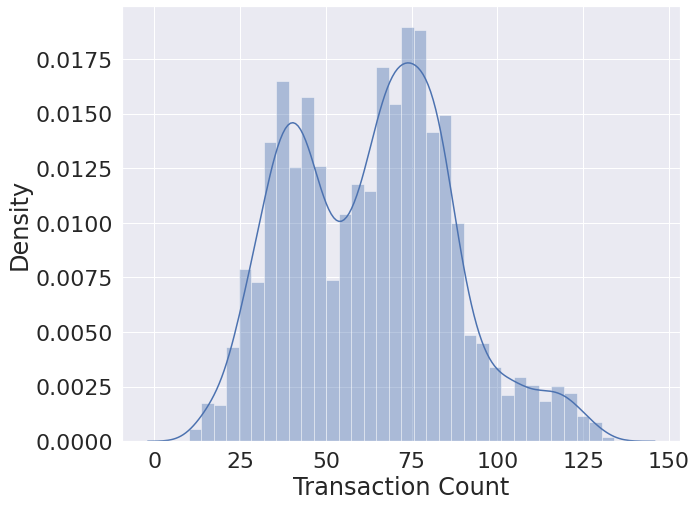

In [ ]:
for col in numerical_large:
  plt.figure(figsize=(10,8))
  sns.distplot(knn_data[col], bins='auto')
  plt.show();
  print()

<Figure size 720x576 with 0 Axes>

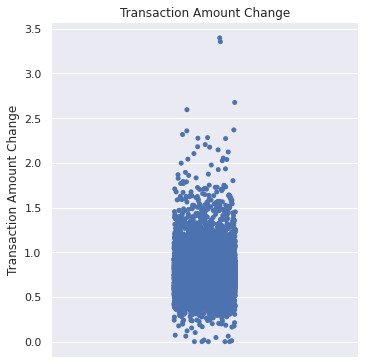

<Figure size 720x576 with 0 Axes>

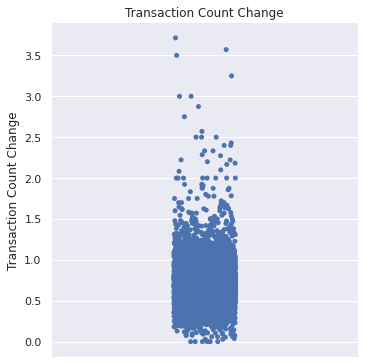

<Figure size 720x576 with 0 Axes>

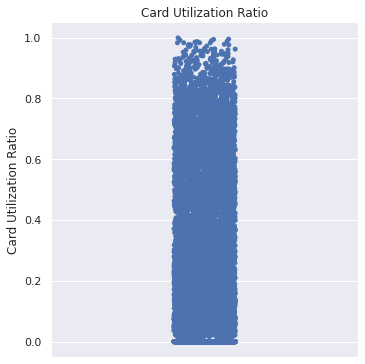

In [153]:
for col in numerical_ratio:
  plt.figure(figsize=(10,8))
  sns.catplot(y=col, data=knn_data)
  plt.title(col)
  plt.show();
  print()

## Variable-Target Bivariate Analysis

### Numerical Variables

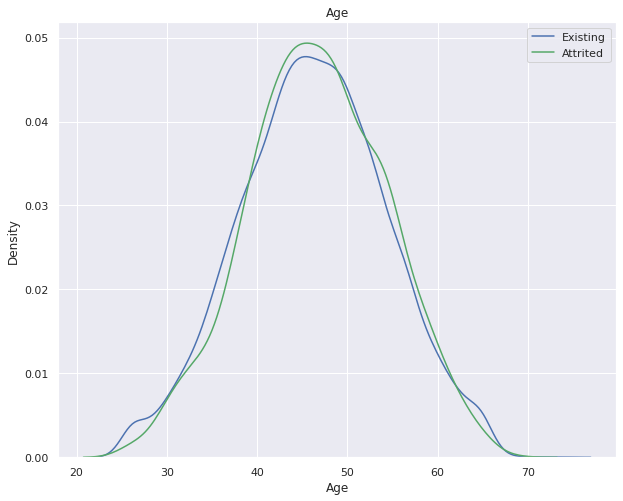

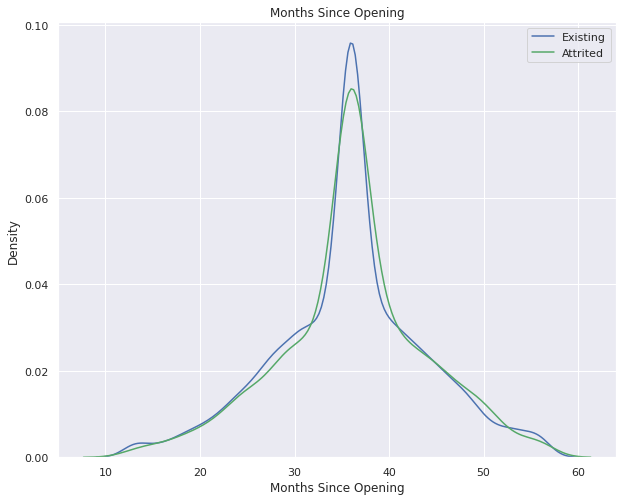

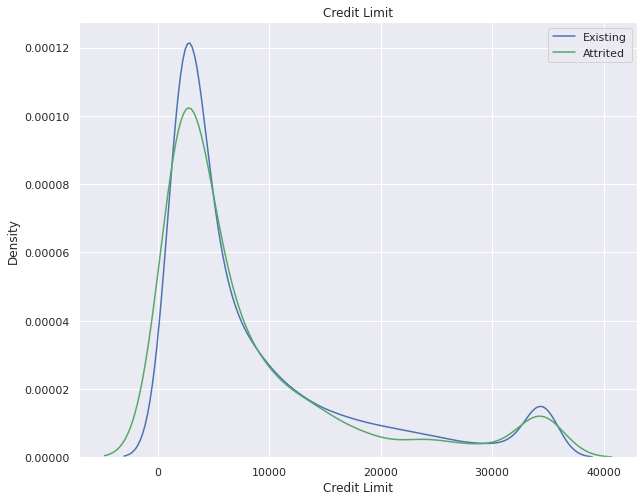

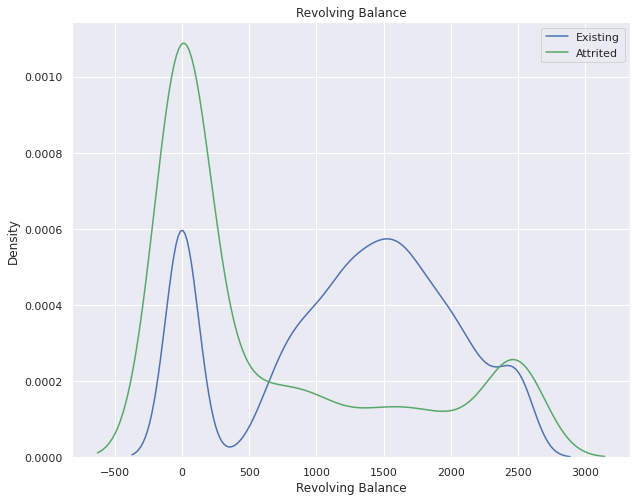

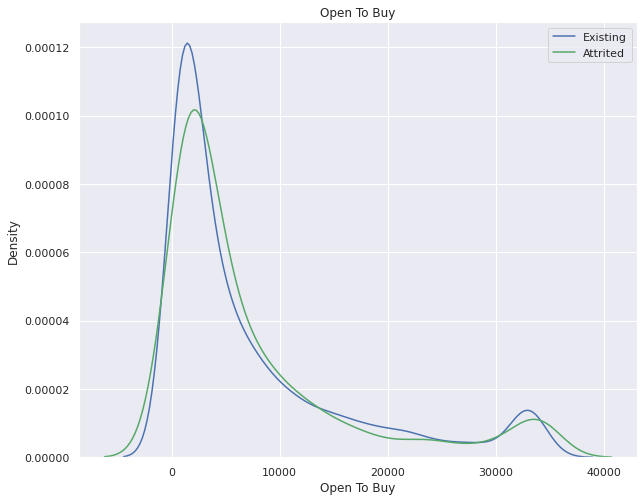

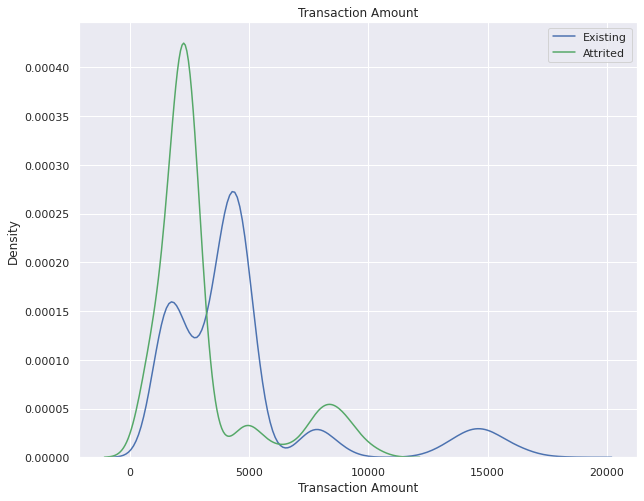

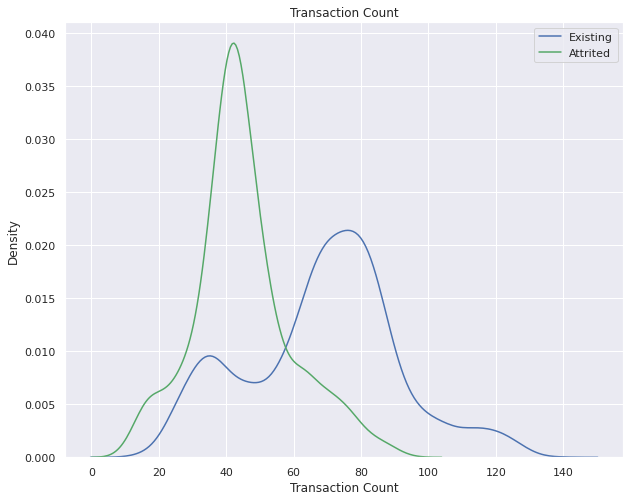

In [154]:
target = knn_data['Status']

for col in numerical_large:

  plt.figure(figsize=(10,8))
  sns.distplot(knn_data[target == 0][col], bins = 'auto', color = 'b', label = 'Existing', hist=False)
  sns.distplot(knn_data[target == 1][col], bins = 'auto', color = 'g', label = 'Attrited', hist=False)
  plt.title(col)
  plt.legend()
  plt.savefig('distplot'+ str(col)+'.jpg')
  plt.show();
  print()

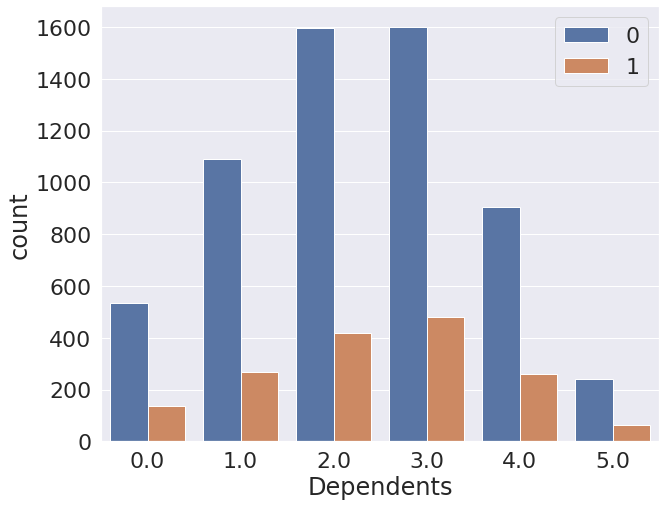


Dependents       0.0      1.0       2.0       3.0       4.0      5.0
Status                                                              
0           0.798507  0.80206  0.792744  0.768492  0.777015  0.79085
1           0.201493  0.19794  0.207256  0.231508  0.222985  0.20915





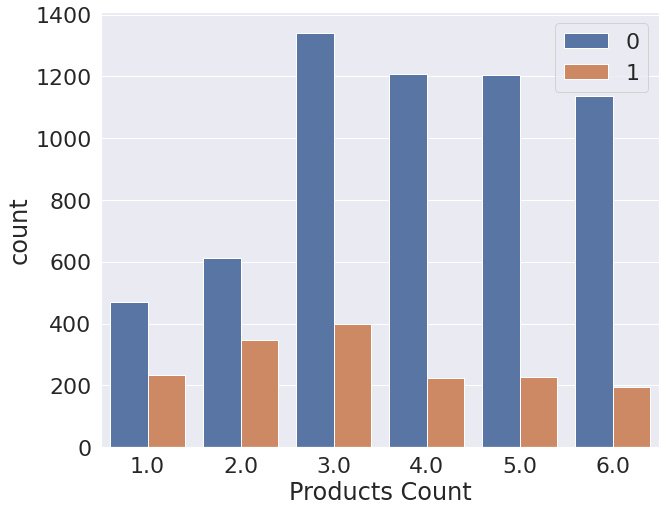


Products Count       1.0       2.0       3.0       4.0       5.0       6.0
Status                                                                    
0               0.668091  0.638831  0.770115  0.843096  0.841259  0.852742
1               0.331909  0.361169  0.229885  0.156904  0.158741  0.147258





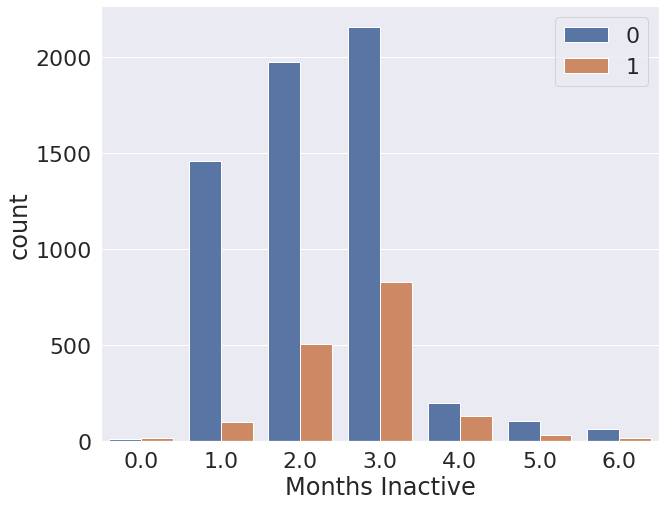


Months Inactive  0.0       1.0       2.0  ...       4.0       5.0       6.0
Status                                    ...                              
0                0.4  0.935897  0.796124  ...  0.607251  0.769784  0.771084
1                0.6  0.064103  0.203876  ...  0.392749  0.230216  0.228916

[2 rows x 7 columns]





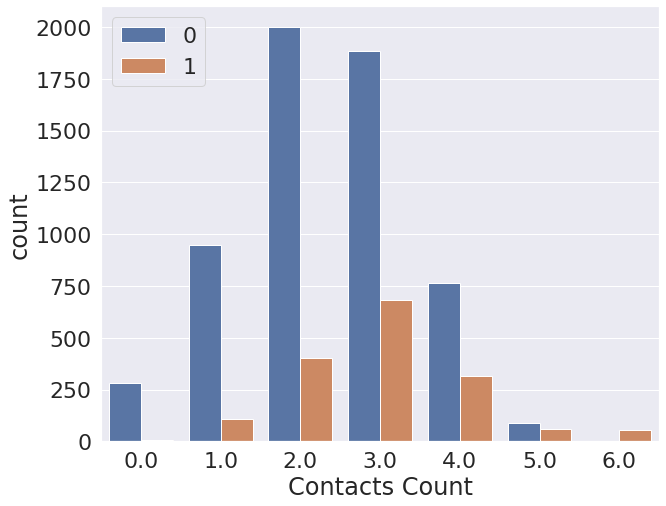


Contacts Count       0.0       1.0       2.0       3.0       4.0       5.0  6.0
Status                                                                         
0               0.975862  0.897824  0.832293  0.734606  0.707792  0.598639  0.0
1               0.024138  0.102176  0.167707  0.265394  0.292208  0.401361  1.0





In [ ]:
for col in numerical_small:
  plt.figure(figsize=(10,8))
  sns.countplot(data=knn_data, x = col, hue = 'Status')
  plt.legend()
  plt.show();

  crosser = pd.crosstab(target, knn_data[col], normalize = 'columns')
  print()
  print(crosser)
  print()
  print()
  print()

<Figure size 720x576 with 0 Axes>

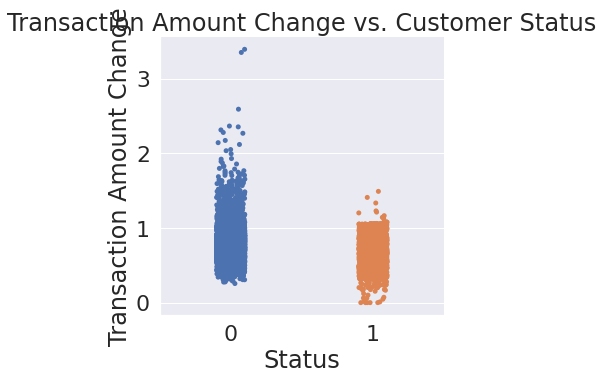

<Figure size 720x576 with 0 Axes>

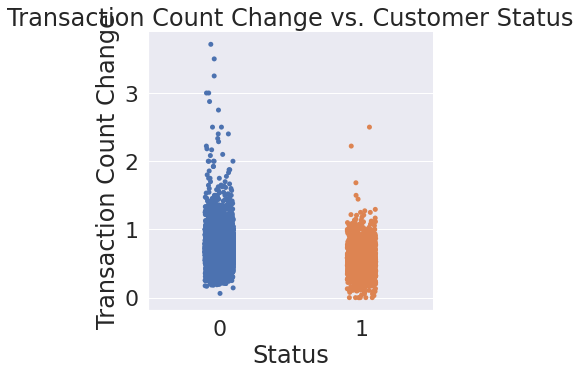

<Figure size 720x576 with 0 Axes>

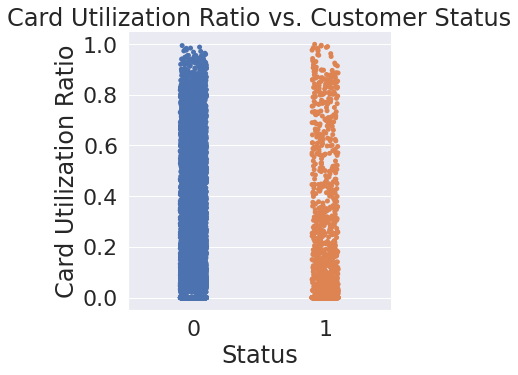

In [ ]:
for col in numerical_ratio:
  plt.figure(figsize=(10,8))
  sns.catplot(x="Status", y=col, order=[0,1], data=knn_data)
  plt.title(col + ' vs. Customer Status')
  plt.show();
  print()

Categorical Variables

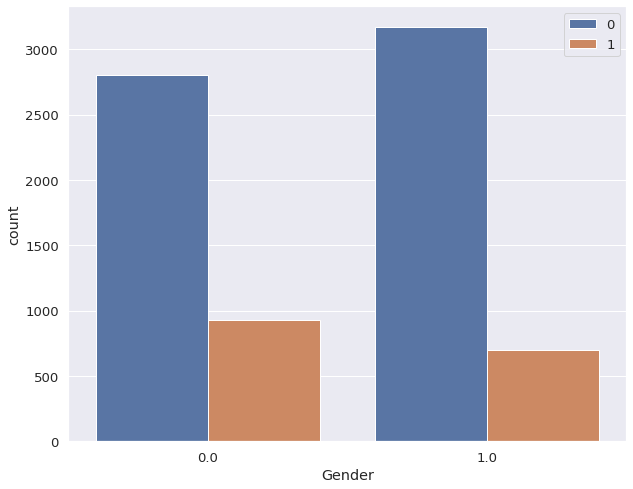


Gender                  0.0       1.0
Status                               
Attrited Customer  0.203817  0.187177
Existing Customer  0.796183  0.812823





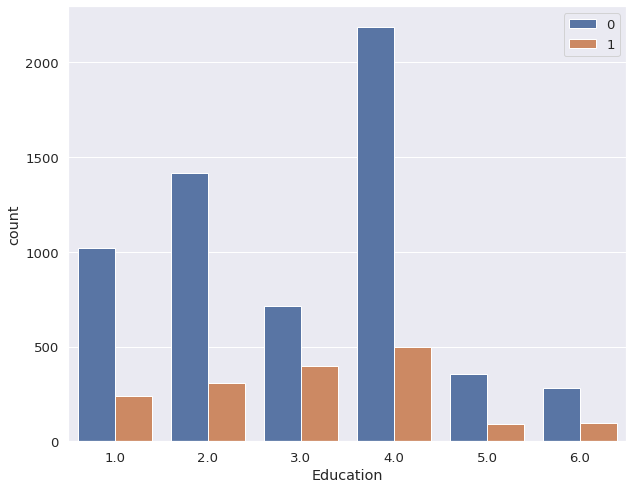


Education               1.0       2.0       3.0      4.0      5.0       6.0
Status                                                                     
Attrited Customer  0.183932  0.190255  0.228944  0.18425  0.22291  0.204724
Existing Customer  0.816068  0.809745  0.771056  0.81575  0.77709  0.795276





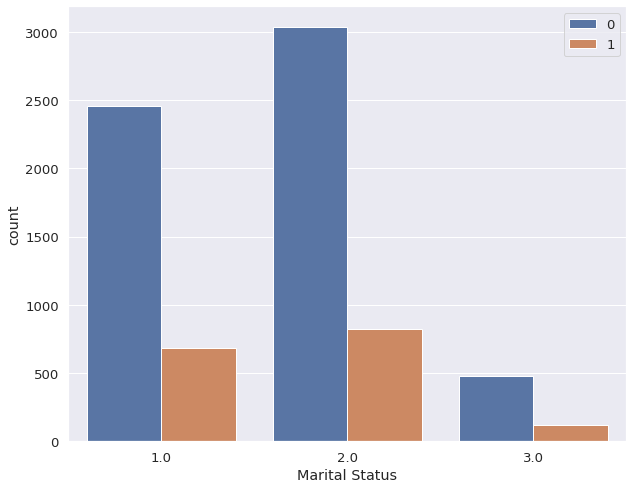


Marital Status          1.0       2.0       3.0
Status                                         
Attrited Customer  0.195081  0.190278  0.229545
Existing Customer  0.804919  0.809722  0.770455





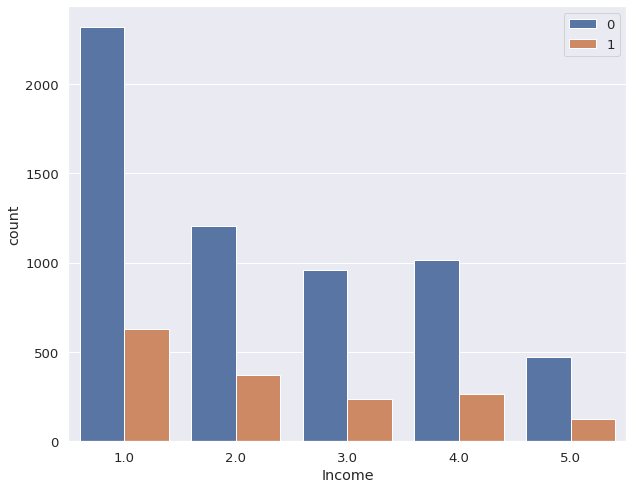


Income                  1.0       2.0      3.0       4.0       5.0
Status                                                            
Attrited Customer  0.204119  0.187606  0.19337  0.188272  0.191781
Existing Customer  0.795881  0.812394  0.80663  0.811728  0.808219





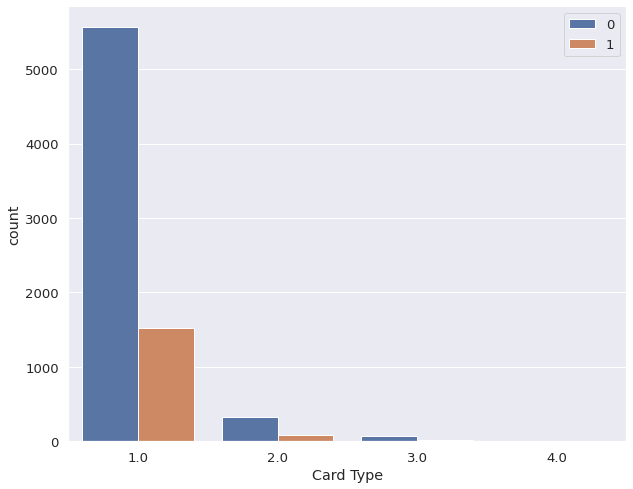


Card Type               1.0       2.0       3.0       4.0
Status                                                   
Attrited Customer  0.193377  0.246835  0.107692  0.166667
Existing Customer  0.806623  0.753165  0.892308  0.833333





In [ ]:

categorical = knn_data[['Gender', 'Education', 'Marital Status', 'Income', 'Card Type']]

for col in categorical:
  plt.figure(figsize=(10,8))
  sns.countplot(data=knn_data, x = col, hue = 'Status')
  plt.legend()
  plt.show();

  crosser = pd.crosstab(target, knn_data[col], normalize = 'columns')
  print()
  print(crosser)
  print()
  print()
  print()

## Correlation

Correlation Matrix

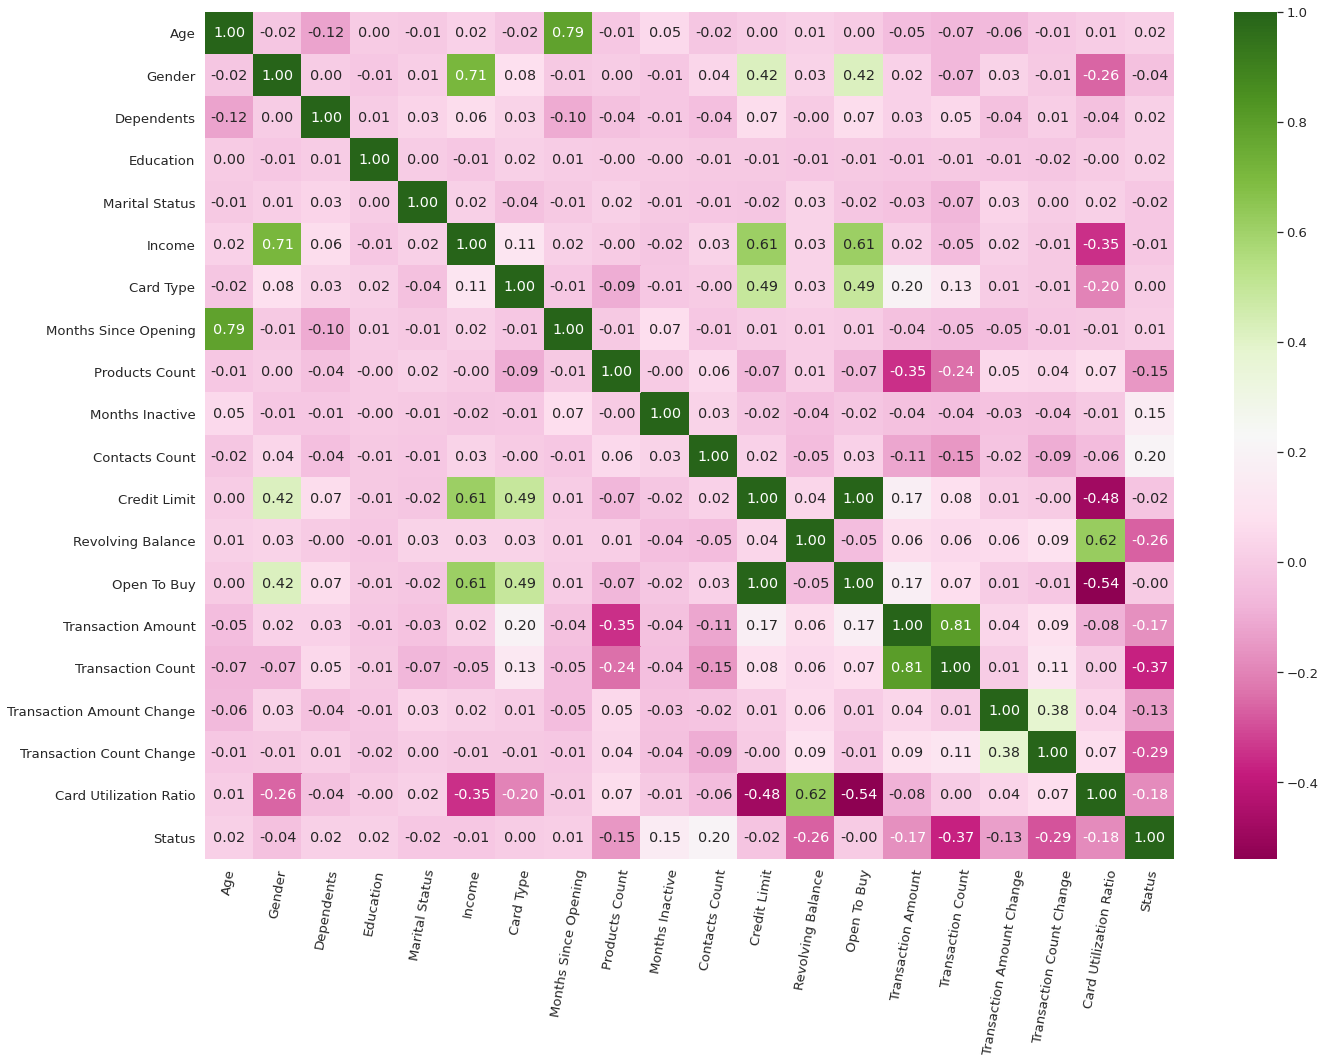

In [335]:
plt.figure(figsize=(20,15))
sns.set(font_scale = 1.2)
sns.heatmap(knn_data.corr(), annot = True, fmt = '.2f', cmap = 'PiYG')
plt.xticks(rotation=80)
plt.savefig('corelationmat.png')
plt.show()

In [ ]:
# Check corralated features with eachother
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.select_dtypes(include=[np.number]).columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    corr = df.select_dtypes(include=[np.number]).corr()
    au_corr = corr.abs().unstack()
    labels_to_drop = get_redundant_pairs(df.select_dtypes(include=[np.number]))
    #From corrolation table, drop the diagonals(which gives 1 corr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(knn_data, 10))

Top Absolute Correlations
Credit Limit        Open To Buy               0.995866
Transaction Amount  Transaction Count         0.808772
Age                 Months Since Opening      0.789000
Gender              Income                    0.764654
Revolving Balance   Card Utilization Ratio    0.639948
Income              Credit Limit              0.604279
                    Open To Buy               0.601065
Open To Buy         Card Utilization Ratio    0.524446
Card Type           Credit Limit              0.480911
                    Open To Buy               0.478563
dtype: float64



### Multicollinearity

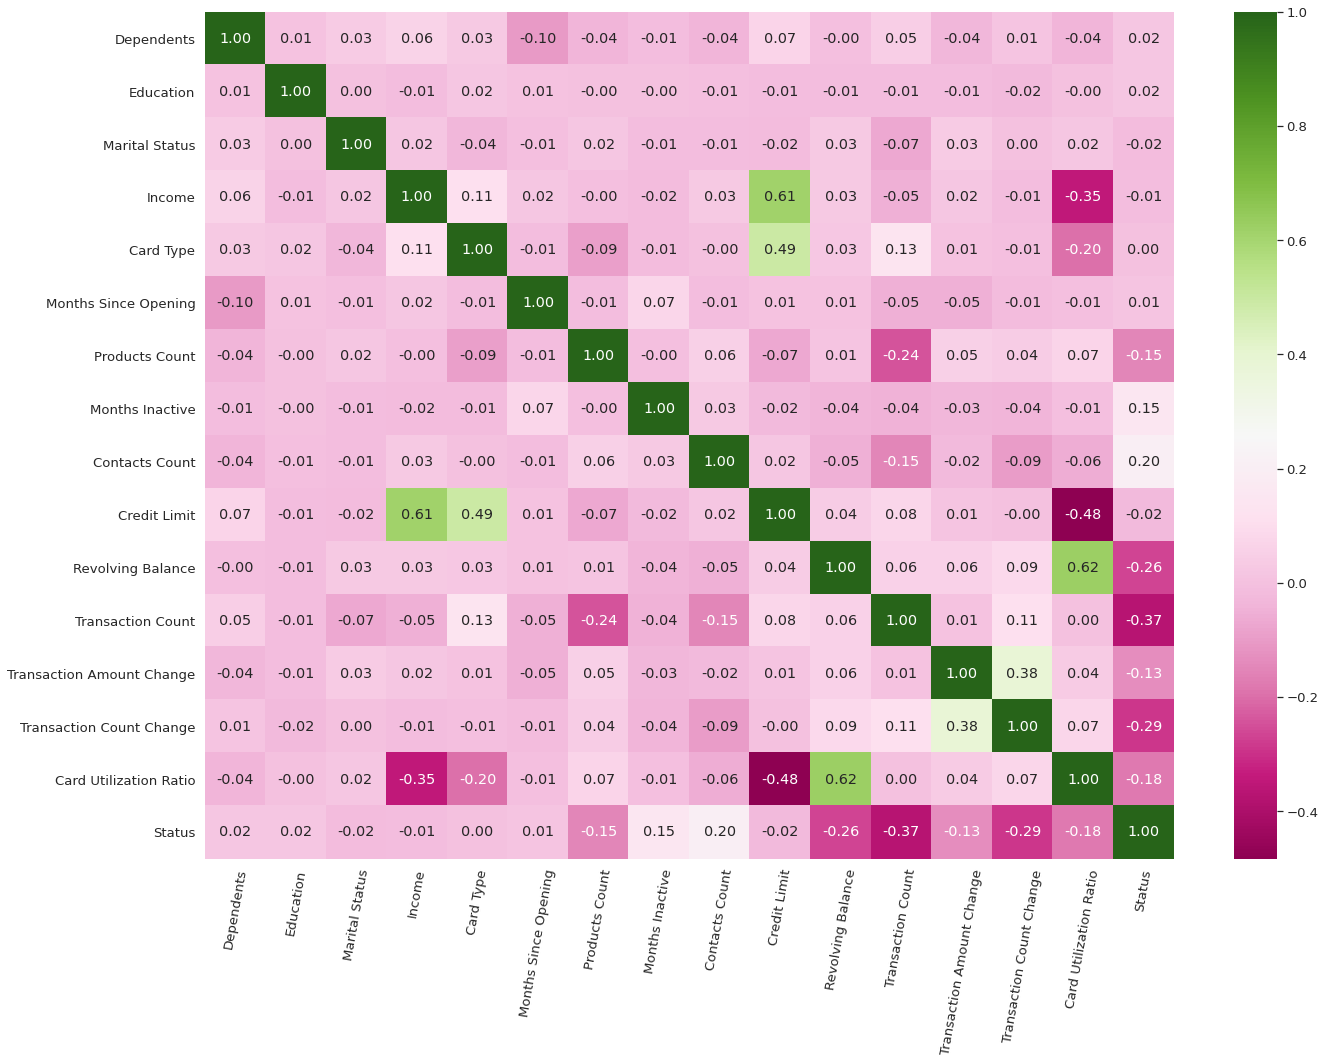

In [336]:
mdata = knn_data.drop(['Age', 'Gender', 'Open To Buy', 'Transaction Amount'], axis=1)

plt.figure(figsize=(20,15))
sns.heatmap(mdata.corr(), annot = True, fmt = '.2f', cmap = 'PiYG')
plt.xticks(rotation=80)
plt.savefig('multicolearity.png')
plt.show()


We have dropped the obviously multicollinear variables from the dataset we will feed our model.



Check corralated features with eachother

In [ ]:
# Check corralated features with eachother
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.select_dtypes(include=[np.number]).columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    corr = df.select_dtypes(include=[np.number]).corr()
    au_corr = corr.abs().unstack()
    labels_to_drop = get_redundant_pairs(df.select_dtypes(include=[np.number]))
    #From corrolation table, drop the diagonals(which gives 1 corr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(mdata, 10))

Top Absolute Correlations
Revolving Balance          Card Utilization Ratio      0.639948
Income                     Credit Limit                0.604279
Card Type                  Credit Limit                0.480911
Credit Limit               Card Utilization Ratio      0.466422
Transaction Count          Status                      0.401690
Transaction Amount Change  Transaction Count Change    0.391540
Income                     Card Utilization Ratio      0.330303
Transaction Count Change   Status                      0.317390
Revolving Balance          Status                      0.290989
Contacts Count             Status                      0.224657
dtype: float64


## oNe hot encoding



In [157]:
mdata['Status'].value_counts()

0    8500
1    1627
Name: Status, dtype: int64

In [158]:
df_ub= knn_data.copy()

We have nearly 4 times as many Existing customers as we do Attrited customers. This is an imbalance that we'll try to correct with a mixture of oversampling and undersampling. To balance the advantages and disadvantages of each technique, we'll apply both to each respective subgroup.

If we halve our majority class (Existing customers) and double our minority class (Attrited customers), we'll achieve an approximately even number of customers from each class.

In [ ]:
# attrited = mdata[knn_data['Status'] == 1]
# attrited = pd.concat([attrited]*2)

# attrited.shape

(3254, 16)

In [ ]:
# existing = mdata[knn_data['Status'] == 0]
# existing = existing.sample(frac = 0.5)

# existing.shape

(2984, 16)

In [ ]:
# mdata = attrited.append(existing, ignore_index=True)
# mdata.shape

(6238, 16)

In [ ]:
# mdata['Status'].value_counts(normalize=True)

1    0.521642
0    0.478358
Name: Status, dtype: float64

Our data is now much more balanced, and it is ready for modeling. We have named the dataset 'mdata'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7595 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Client ID                  7595 non-null   int64  
 1   Status                     7595 non-null   object 
 2   Age                        7595 non-null   int64  
 3   Gender                     7595 non-null   object 
 4   Dependents                 7595 non-null   int64  
 5   Education                  7595 non-null   object 
 6   Marital Status             7595 non-null   object 
 7   Income                     7595 non-null   object 
 8   Card Type                  7595 non-null   object 
 9   Months Since Opening       7595 non-null   int64  
 10  Products Count             7595 non-null   int64  
 11  Months Inactive            7595 non-null   int64  
 12  Contacts Count             7595 non-null   int64  
 13  Credit Limit               7595 non-null   floa

In [ ]:
categorical

,Gender,Education,Marital Status,Income,Card Type
0,1.0,2.0,2.0,3.0,1.0
1,0.0,4.0,1.0,1.0,1.0
2,1.0,4.0,2.0,4.0,1.0
3,1.0,1.0,2.0,3.0,1.0
4,1.0,4.0,2.0,2.0,1.0
...,...,...,...,...,...
7590,1.0,4.0,1.0,2.0,1.0
7591,1.0,3.0,3.0,2.0,1.0
7592,0.0,2.0,2.0,1.0,1.0
7593,1.0,4.0,2.0,2.0,1.0


In [160]:
#what is left of the categorical variables
categorical_1=['Education', 'Marital Status', 'Income',
       'Card Type']

In [ ]:

# df= pd.get_dummies(mdata, columns = categorical_1, drop_first=True)

In [161]:
#unbalanced data frame to try USing IMB learn to balance later

df= pd.get_dummies(df_ub, columns = categorical_1, drop_first=True)

# Modelling

In [163]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    model_name = type(model).__name__
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('cmfor'+ str(model_name)+'.jpg')
    #fig.savefig('confusion_matrix'+str(learning_values.pop())+'.jpg')

function to caculate scores

In [164]:
##  Function to calculate our parameters score
def get_metrics_scores(model, flag=True, title='Model Title'):
    '''
    model : classifier to predict values of X

    '''
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    ## add metrics to list
    a = [title, 
         metrics.accuracy_score(y_train, pred_train), metrics.accuracy_score(y_test, pred_test), 
         metrics.recall_score(y_train,pred_train), metrics.recall_score(y_test,pred_test), 
         metrics.precision_score(y_train,pred_train), metrics.precision_score(y_test,pred_test), 
         metrics.f1_score(y_train,pred_train), metrics.f1_score(y_test,pred_test)
        ]
    
    
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ", a[1])
        print("Accuracy on test set : ", a[2])
        
        print("Recall on training set : ", a[3])
        print("Recall on test set : ", a[4])
        
        print("Precision on training set : ", a[5])
        print("Precision on test set : ", a[6])
        
        print("F1 on training set : ", a[7])
        print("F1 on test set : ", a[8])
    
    return a # returning the list with train and test scores



In [172]:
##  Function to calculate our parameters score
def get_metrics_scores_2(model,X_train, y_train, flag=True, title='Model Title'):
    '''
    model : classifier to predict values of X

    '''
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    ## add metrics to list
    a = [title, 
         metrics.accuracy_score(y_train, pred_train), metrics.accuracy_score(y_test, pred_test), 
         metrics.recall_score(y_train,pred_train), metrics.recall_score(y_test,pred_test), 
         metrics.precision_score(y_train,pred_train), metrics.precision_score(y_test,pred_test), 
         metrics.f1_score(y_train,pred_train), metrics.f1_score(y_test,pred_test)
        ]
    
    
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ", a[1])
        print("Accuracy on test set : ", a[2])
        
        print("Recall on training set : ", a[3])
        print("Recall on test set : ", a[4])
        
        print("Precision on training set : ", a[5])
        print("Precision on test set : ", a[6])
        
        print("F1 on training set : ", a[7])
        print("F1 on test set : ", a[8])
    
    return a # returning the list with train and test scores



In [173]:

#plan to keep all the scores in a list at the end
models_Metrics = []

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### Splitting Data Into Train And Test Sets

In [313]:
# set x and y
X = df.drop('Status', axis = 1)
y = df['Status']

# train test split
# stratify=y preserve the proportion of target as in orginal dataset in the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)


In [314]:
X_train.shape

(7595, 29)


# Balancing the Data


### SMote up sampling

In [315]:

from imblearn.over_sampling import SMOTE

In [316]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())  #fit is part of smote library, X_train is out inde variable
#Remember SMOTE us Knearest neighbor algorithm on minority class and create data

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '1': 1220
Before UpSampling, counts of label '0': 6375 

After UpSampling, counts of label '1': 6375
After UpSampling, counts of label '0': 6375 

After UpSampling, the shape of train_X: (12750, 29)
After UpSampling, the shape of train_y: (12750,) 



In [317]:

logreg_OS = LogisticRegression()

# fit model
logreg_OS.fit(X_train_res, y_train_res)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

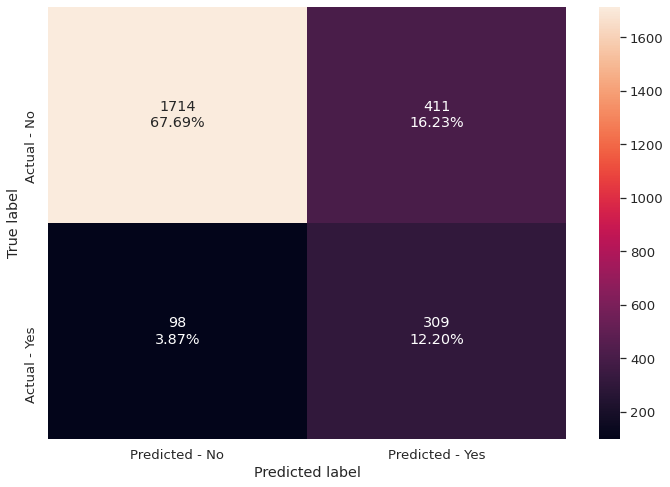

In [318]:
make_confusion_matrix(logreg_OS,y_test)

In [176]:

models_Metrics.append(get_metrics_scores_2(logreg_OS,X_train_res, y_train_res, title='Logistic regression SMote'))


Accuracy on training set :  0.8074509803921569
Accuracy on test set :  0.7989731437598736
Recall on training set :  0.8021960784313725
Recall on test set :  0.7592137592137592
Precision on training set :  0.810716550412175
Precision on test set :  0.42916666666666664
F1 on training set :  0.806433809035717
F1 on test set :  0.5483584738243124


## Logistic Regression

First let's built and try it on simple model.

In [308]:

# set the model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [309]:
# Baseline accuracy = proportion of the majority class
print('Baseline Accuracy: ',1. - y_train.mean())
print('Train Accuracy :',logreg.score(X_train, y_train))
print('Test Accuracy: ',logreg.score(X_test, y_test))

Baseline Accuracy:  0.8393680052666228
Train Accuracy : 0.8883475971033574
Test Accuracy:  0.8984992101105845


In [310]:
# confusion matrix
y_pred = logreg.predict(X_test)
cf = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cf, columns=['pred neg','pred pos'], index=['actual neg','actual pos'])

,pred neg,pred pos
actual neg,2054,71
actual pos,186,221


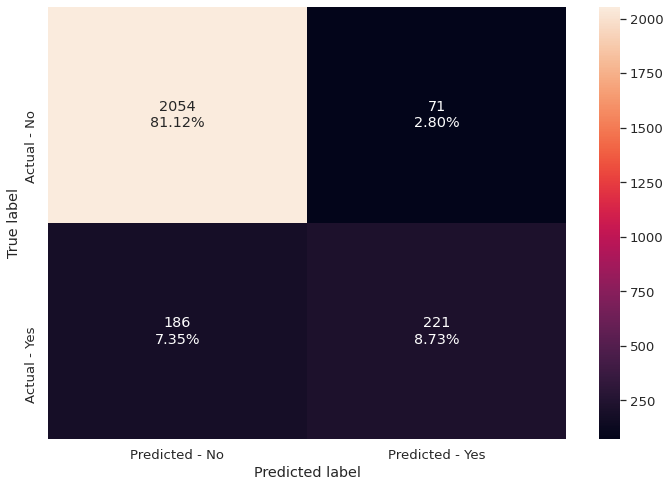

In [311]:
make_confusion_matrix(logreg,y_test)

In [312]:
models_Metrics.append(get_metrics_scores(logreg, title='Logistic Regression (default parameters)'))


Accuracy on training set :  0.8883475971033574
Accuracy on test set :  0.8984992101105845
Recall on training set :  0.5229508196721312
Recall on test set :  0.542997542997543
Precision on training set :  0.7057522123893806
Precision on test set :  0.7568493150684932
F1 on training set :  0.60075329566855
F1 on test set :  0.6323319027181689


In [ ]:
from IPython import display
def confisuon_matrix_summary(y_test, model, treshold):
    
    model_pred_proba = model.predict_proba(X_test)[:,1]
    cf = metrics.confusion_matrix(y_true=y_test, y_pred=model_pred_proba > treshold)
    cm = pd.DataFrame(cf, columns=['pred neg','pred pos'], index=['actual neg','actual pos'])
    
    display.display(cm)
    
    print('Classification treshold is ', treshold)
    # Recall, also known as the sensitivity, hit rate, or the true positive rate (TPR), is the proportion of the total amount of relevant instances that were actually retrieved. 
    # It answers the question “What proportion of actual positives was identified correctly?”
    print('True Positive Rate/Recall = TP/(TP+FN) :', cf[1][1] / (cf[1][1] + cf[1][0]))     #same as metrics.recall_score(y_test,y_pred)
    print('False Positive Rate = FP/(FP+TN) :', cf[0][1] / (cf[0][1] + cf[0][0]))
    # Accuracy - ratio of correctly predicted observation to the total observations.
    print('Accuracy = (TP+TN)/total :', (cf[1][1]+cf[0][0])/(cf[1][1]+cf[0][0]+cf[0][1]+cf[1][0]))
    # Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
    # It answers the question “What proportion of positive identifications was actually correct?”
    print('Precision = TP/(TP+FP) :',  (cf[1][1]/(cf[1][1]+cf[0][1])))   #same as metrics.precision_score(y_test,y_pred)
    
confisuon_matrix_summary(y_test, logreg, 0.5)

,pred neg,pred pos
actual neg,600,146
actual pos,161,653


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.8022113022113022
False Positive Rate = FP/(FP+TN) : 0.19571045576407506
Accuracy = (TP+TN)/total : 0.8032051282051282
Precision = TP/(TP+FP) : 0.8172715894868585


In [ ]:
# Examine the coefficients.
# The higher the coefficient, the higher the “importance” of a feature.

coefficients = list(zip(X_train.columns, logreg.coef_[0]))
coefficients

[('Dependents', 0.22818034673074633),
 ('Months Since Opening', 0.03748818256775343),
 ('Products Count', -0.3591086661644147),
 ('Months Inactive', 0.5580422336816103),
 ('Contacts Count', 0.6217143631605104),
 ('Credit Limit', 1.1882898048041819e-05),
 ('Revolving Balance', -0.0007805316727643051),
 ('Transaction Count', -0.05369258769445196),
 ('Transaction Amount Change', 0.02812982604579636),
 ('Transaction Count Change', -0.08910269335818172),
 ('Card Utilization Ratio', 0.002728281283235695),
 ('Education_2.0', -0.04141242260876503),
 ('Education_3.0', 0.18019917244152822),
 ('Education_4.0', -0.046062357792971194),
 ('Education_5.0', 0.015131731075483983),
 ('Education_6.0', 0.009257791196711591),
 ('Marital Status_2.0', -0.008504876050180677),
 ('Marital Status_3.0', -0.000381780866414067),
 ('Income_2.0', 0.06355038297734841),
 ('Income_3.0', -0.0013417985382024916),
 ('Income_4.0', -0.0051473718095929955),
 ('Income_5.0', -0.022944428003205418),
 ('Card Type_2.0', 0.01352517

In [212]:
# K-folds Cross Validation
from sklearn.model_selection import cross_val_score

Mean of Accuracy for all  5  folds:  Accuracy:  0.7951207256389694
Mean of Precision  5  folds:  Precision:  0.7990130424564081
Mean of Recall  5  folds:  Recall:  0.7951207256389694
Mean of Accuracy for all  6  folds:  Accuracy:  0.7957571382739813
Mean of Precision  6  folds:  Precision:  0.8008774022027411
Mean of Recall  6  folds:  Recall:  0.7957571382739813
Mean of Accuracy for all  7  folds:  Accuracy:  0.7959190092971857
Mean of Precision  7  folds:  Precision:  0.7998848754287791
Mean of Recall  7  folds:  Recall:  0.7959190092971857
Mean of Accuracy for all  8  folds:  Accuracy:  0.794628015865179
Mean of Precision  8  folds:  Precision:  0.8013019535347178
Mean of Recall  8  folds:  Recall:  0.794628015865179
Mean of Accuracy for all  9  folds:  Accuracy:  0.7978425672950168
Mean of Precision  9  folds:  Precision:  0.8024551248031782
Mean of Recall  9  folds:  Recall:  0.7978425672950168


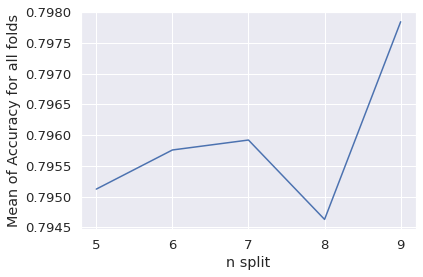

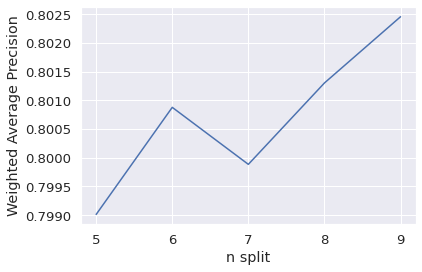

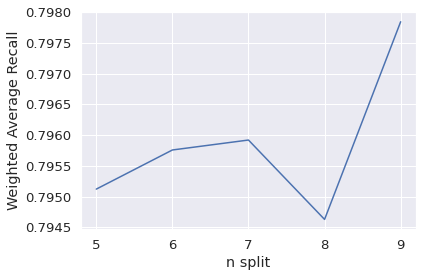

In [ ]:


def cross_val_accuracy_precision(model, X, y):
    acc = []
    precisions=[]
    recalls=[]
    for n in range(5,10):

        # Note the results will vary each run since we take a different
        # subset of the data each time (since shuffle=True)
        scores = np.mean(cross_val_score(model, X, y, cv=n, scoring='accuracy'))
        acc.append(scores)
        p = np.mean(cross_val_score(model, X, y, cv=n, scoring=metrics.make_scorer(metrics.precision_score, average='weighted')))
        precisions.append(p)
        r = np.mean(cross_val_score(model, X, y, cv=n, scoring=metrics.make_scorer(metrics.recall_score, average='weighted')))
        recalls.append(r)
        print('Mean of Accuracy for all ', str(n), ' folds: ', 'Accuracy: ', scores)
        print('Mean of Precision ', str(n), ' folds: ', 'Precision: ', p)
        print('Mean of Recall ', str(n), ' folds: ', 'Recall: ', r)
        
    # plot to see clearly
    plt.plot(range(5,10), acc)
    plt.xlabel('n split')
    plt.ylabel('Mean of Accuracy for all folds')
    plt.show();
    plt.plot(range(5,10), precisions)
    plt.xlabel('n split')
    plt.ylabel('Weighted Average Precision')
    plt.show();
    plt.plot(range(5,10), recalls)
    plt.xlabel('n split')
    plt.ylabel('Weighted Average Recall')
    plt.show();
    
logreg_cv=LogisticRegression()
cross_val_accuracy_precision(logreg_cv, X, y)

Now let's try to tune parameters and see if we going to get better recall.

Parameter Tuning with GridSearch

In [182]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

clf = GridSearchCV(pipe, 
                   param_grid = param_grid, 
                   cv = 5, 
                   scoring=metrics.make_scorer(metrics.recall_score), # maximise recall to minimise FN
                   return_train_score=True,
                   n_jobs=-1,
                   verbose=True)
clf.fit(X, y)  
clf.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   26.5s finished


Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=29.763514416313132, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l1',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [183]:
# # # set x and y
# # X = bankchurners_df.drop('churn', axis = 1)
# # y = bankchurners_df['churn']

# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

# set the model
logreg_tuned = LogisticRegression(C=29.763514416313132, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l1',
                                    random_state=None, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False)

# fit model
logreg_tuned.fit(X_train, y_train)

LogisticRegression(C=29.763514416313132, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

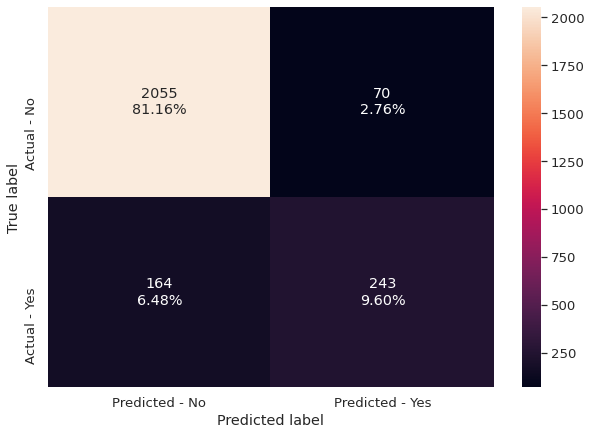

In [184]:
make_confusion_matrix(logreg_tuned,y_test)

In [185]:
models_Metrics.append(get_metrics_scores(logreg_tuned, title='Logistic Regression (Tuned_unbalanced)'))

Accuracy on training set :  0.9042791310072416
Accuracy on test set :  0.9075829383886256
Recall on training set :  0.5836065573770491
Recall on test set :  0.597051597051597
Precision on training set :  0.7647690655209453
Precision on test set :  0.7763578274760383
F1 on training set :  0.6620176662017666
F1 on test set :  0.675


### Ridge Classifier

In [210]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# RidgeClassifier


# # set x and y
# X = df.drop('Status', axis = 1)
# y = df['Status']

# # train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
print('Train Accuracy :',ridge.score(X_train, y_train))
print('Test Accuracy: ',ridge.score(X_test, y_test))

Train Accuracy : 0.830910645575032
Test Accuracy:  0.8153846153846154


In [ ]:
# Baseline accuracy = proportion of the majority class
1. - y_train.mean()

0.47840957674219753

In [ ]:
models_Metrics.append(get_metrics_scores(ridge, title='Ridge classifer'))

Accuracy on training set :  0.830910645575032
Accuracy on test set :  0.8153846153846154
Recall on training set :  0.8413934426229508
Recall on test set :  0.8194103194103194
Precision on training set :  0.8355718355718356
Precision on test set :  0.8254950495049505
F1 on training set :  0.8384725342046151
F1 on test set :  0.8224414303329223


### Parameter Tuning with GridSearch

Mean of Accuracy for all  5  folds:  Scores:  0.8162827966607036
Mean of Precision  5  folds:  Precision:  0.821766524107511
Mean of Accuracy for all  6  folds:  Scores:  0.8140319217196023
Mean of Precision  6  folds:  Precision:  0.8211015439075675
Mean of Accuracy for all  7  folds:  Scores:  0.8154755613649485
Mean of Precision  7  folds:  Precision:  0.8214161887014113
Mean of Accuracy for all  8  folds:  Scores:  0.8132210509858135
Mean of Precision  8  folds:  Precision:  0.8221166068906718
Mean of Accuracy for all  9  folds:  Scores:  0.8173986329605927
Mean of Precision  9  folds:  Precision:  0.8239340531657003


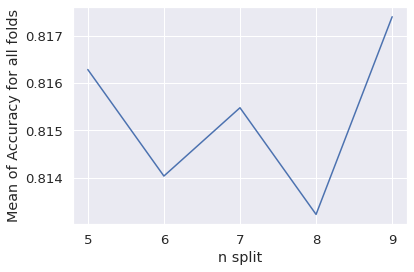

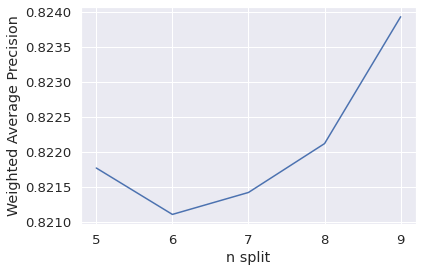

In [ ]:
from sklearn.pipeline import make_pipeline
acc = []
precisions=[]
for n in range(5,10):
    
    pipe = make_pipeline(StandardScaler(), RidgeClassifier())

    # Note the results will vary each run since we take a different
    # subset of the data each time (since shuffle=True)
    scores = np.mean(cross_val_score(pipe, X, y, cv=n, scoring='accuracy'))
    acc.append(scores)
    p= np.mean(cross_val_score(pipe, X, y, cv=n, scoring=metrics.make_scorer(metrics.precision_score, average='weighted')))
    precisions.append(p)
    print('Mean of Accuracy for all ', str(n), ' folds: ', 'Scores: ', scores)
    print('Mean of Precision ', str(n), ' folds: ', 'Precision: ', p)

# plot to see clearly
plt.plot(range(5,10), acc)
plt.xlabel('n split')
plt.ylabel('Mean of Accuracy for all folds')
plt.show();
plt.plot(range(5,10), precisions)
plt.xlabel('n split')
plt.ylabel('Weighted Average Precision')
plt.show();

0.42892232277460096

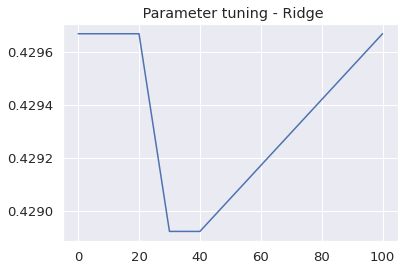

In [ ]:
# Parameter Tuning with ridge error
def rmse_ridge(ridge_model):
    ridge_model.fit(X_train, y_train)
    ridge_pre = ridge_model.predict(X_test)
    squared = np.square(ridge_pre-y_test)
    ridge_error = np.sqrt(np.sum(squared)/len(y_test))
    return(ridge_error)

alphas = [0.01, 0.02, 0.1, 0.3, 1, 3, 5, 10, 20, 30,40,100]
cv_ridge = [rmse_ridge(RidgeClassifier(alpha = alpha )).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = " Parameter tuning - Ridge")
cv_ridge.min()



In [ ]:
import joblib
joblib.parallel_backend('threading')
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

pipe=make_pipeline(StandardScaler(),RidgeClassifier()) #, class_weight='balanced'

grid_search = GridSearchCV(
    pipe, 
    {'ridgeclassifier__alpha': range(0,100)},  # Tried [0, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 100] as well
    cv=StratifiedKFold(10, random_state=10, shuffle=True),
    scoring=metrics.make_scorer(metrics.recall_score), # maximise recall to minimise FN
    return_train_score=True,
    n_jobs=-1,
    verbose=3)

#X_sc = scaler.transform(X)  # can use this if I don't use pipe
grid_search.fit(X, y)
grid_search.best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] ridgeclassifier__alpha=0 ........................................
[CV] ridgeclassifier__alpha=0 ........................................
[CV]  ridgeclassifier__alpha=0, score=(train=0.829, test=0.868), total=   0.0s[CV]  ridgeclassifier__alpha=0, score=(train=0.834, test=0.801), total=   0.0s
[CV] ridgeclassifier__alpha=0 ........................................

[CV] ridgeclassifier__alpha=0 ........................................
[CV]  ridgeclassifier__alpha=0, score=(train=0.832, test=0.825), total=   0.1s
[CV] ridgeclassifier__alpha=0 ........................................
[CV]  ridgeclassifier__alpha=0, score=(train=0.837, test=0.807), total=   0.1s
[CV] ridgeclassifier__alpha=0 ........................................


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


[CV]  ridgeclassifier__alpha=0, score=(train=0.831, test=0.822), total=   0.1s
[CV] ridgeclassifier__alpha=0 ........................................
[CV]  ridgeclassifier__alpha=0, score=(train=0.834, test=0.840), total=   0.1s
[CV] ridgeclassifier__alpha=0 ........................................
[CV]  ridgeclassifier__alpha=0, score=(train=0.829, test=0.834), total=   0.0s
[CV] ridgeclassifier__alpha=0 ........................................
[CV]  ridgeclassifier__alpha=0, score=(train=0.831, test=0.812), total=   0.1s
[CV] ridgeclassifier__alpha=0 ........................................
[CV]  ridgeclassifier__alpha=0, score=(train=0.837, test=0.837), total=   0.0s
[CV] ridgeclassifier__alpha=1 ........................................
[CV]  ridgeclassifier__alpha=0, score=(train=0.829, test=0.858), total=   0.0s
[CV] ridgeclassifier__alpha=1 ........................................
[CV]  ridgeclassifier__alpha=1, score=(train=0.829, test=0.868), total=   0.1s
[CV] ridgeclassifier_

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.1s


[CV]  ridgeclassifier__alpha=2, score=(train=0.829, test=0.858), total=   0.1s
[CV] ridgeclassifier__alpha=3 ........................................
[CV]  ridgeclassifier__alpha=3, score=(train=0.829, test=0.868), total=   0.0s
[CV] ridgeclassifier__alpha=3 ........................................
[CV]  ridgeclassifier__alpha=3, score=(train=0.834, test=0.801), total=   0.0s
[CV] ridgeclassifier__alpha=3 ........................................
[CV]  ridgeclassifier__alpha=3, score=(train=0.832, test=0.825), total=   0.1s
[CV] ridgeclassifier__alpha=3 ........................................
[CV]  ridgeclassifier__alpha=3, score=(train=0.837, test=0.807), total=   0.1s
[CV] ridgeclassifier__alpha=3 ........................................
[CV]  ridgeclassifier__alpha=3, score=(train=0.831, test=0.822), total=   0.1s
[CV] ridgeclassifier__alpha=3 ........................................
[CV]  ridgeclassifier__alpha=3, score=(train=0.834, test=0.840), total=   0.1s
[CV] ridgeclassifier_

[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    4.8s


[CV]  ridgeclassifier__alpha=13, score=(train=0.829, test=0.868), total=   0.1s
[CV] ridgeclassifier__alpha=13 .......................................
[CV]  ridgeclassifier__alpha=13, score=(train=0.834, test=0.801), total=   0.1s
[CV] ridgeclassifier__alpha=13 .......................................
[CV]  ridgeclassifier__alpha=13, score=(train=0.832, test=0.825), total=   0.0s
[CV] ridgeclassifier__alpha=13 .......................................
[CV]  ridgeclassifier__alpha=13, score=(train=0.837, test=0.807), total=   0.1s
[CV] ridgeclassifier__alpha=13 .......................................
[CV]  ridgeclassifier__alpha=13, score=(train=0.830, test=0.822), total=   0.1s
[CV] ridgeclassifier__alpha=13 .......................................
[CV]  ridgeclassifier__alpha=13, score=(train=0.834, test=0.840), total=   0.1s
[CV] ridgeclassifier__alpha=13 .......................................
[CV]  ridgeclassifier__alpha=13, score=(train=0.831, test=0.812), total=   0.1s
[CV] ridgeclas

[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   11.0s


[CV]  ridgeclassifier__alpha=28, score=(train=0.833, test=0.840), total=   0.1s
[CV] ridgeclassifier__alpha=28 .......................................
[CV]  ridgeclassifier__alpha=28, score=(train=0.831, test=0.812), total=   0.1s
[CV] ridgeclassifier__alpha=28 .......................................
[CV]  ridgeclassifier__alpha=28, score=(train=0.829, test=0.834), total=   0.1s
[CV] ridgeclassifier__alpha=28 .......................................
[CV]  ridgeclassifier__alpha=28, score=(train=0.835, test=0.837), total=   0.0s
[CV] ridgeclassifier__alpha=29 .......................................
[CV]  ridgeclassifier__alpha=28, score=(train=0.829, test=0.858), total=   0.1s
[CV] ridgeclassifier__alpha=29 .......................................
[CV]  ridgeclassifier__alpha=29, score=(train=0.829, test=0.868), total=   0.1s
[CV] ridgeclassifier__alpha=29 .......................................
[CV]  ridgeclassifier__alpha=29, score=(train=0.834, test=0.801), total=   0.0s
[CV] ridgeclas

[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:   18.9s


[CV]  ridgeclassifier__alpha=51, score=(train=0.829, test=0.868), total=   0.0s
[CV] ridgeclassifier__alpha=51 .......................................
[CV]  ridgeclassifier__alpha=51, score=(train=0.833, test=0.801), total=   0.1s
[CV] ridgeclassifier__alpha=51 .......................................
[CV]  ridgeclassifier__alpha=51, score=(train=0.832, test=0.825), total=   0.1s
[CV] ridgeclassifier__alpha=51 .......................................
[CV]  ridgeclassifier__alpha=51, score=(train=0.838, test=0.807), total=   0.1s
[CV] ridgeclassifier__alpha=51 .......................................
[CV]  ridgeclassifier__alpha=51, score=(train=0.829, test=0.818), total=   0.1s
[CV] ridgeclassifier__alpha=51 .......................................
[CV]  ridgeclassifier__alpha=51, score=(train=0.833, test=0.840), total=   0.0s
[CV] ridgeclassifier__alpha=51 .......................................
[CV]  ridgeclassifier__alpha=51, score=(train=0.830, test=0.812), total=   0.0s
[CV] ridgeclas

[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   29.1s


[CV]  ridgeclassifier__alpha=79, score=(train=0.830, test=0.812), total=   0.1s
[CV] ridgeclassifier__alpha=79 .......................................
[CV]  ridgeclassifier__alpha=79, score=(train=0.828, test=0.834), total=   0.1s
[CV] ridgeclassifier__alpha=79 .......................................
[CV]  ridgeclassifier__alpha=79, score=(train=0.834, test=0.837), total=   0.1s
[CV] ridgeclassifier__alpha=80 .......................................
[CV]  ridgeclassifier__alpha=79, score=(train=0.829, test=0.858), total=   0.1s
[CV] ridgeclassifier__alpha=80 .......................................
[CV]  ridgeclassifier__alpha=80, score=(train=0.829, test=0.868), total=   0.1s
[CV] ridgeclassifier__alpha=80 .......................................
[CV]  ridgeclassifier__alpha=80, score=(train=0.833, test=0.801), total=   0.1s
[CV] ridgeclassifier__alpha=80 .......................................
[CV]  ridgeclassifier__alpha=80, score=(train=0.832, test=0.825), total=   0.1s
[CV] ridgeclas

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   36.7s finished


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridgeclassifier',
                 RidgeClassifier(alpha=0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 normalize=False, random_state=None,
                                 solver='auto', tol=0.001))],
         verbose=False)

* Maximize recall: best value found in alpha = 0
* Maximize precision: best value found in alpha = 97
* Maximize accuracy: best value found in alpha = 5

Let's run the model with those alphas to see if we going to get any better recall, precision or accuracy.

In [ ]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridgeclassifier',
                 RidgeClassifier(alpha=0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 normalize=False, random_state=None,
                                 solver='auto', tol=0.001))],
         verbose=False)

In [ ]:
# set x and y
X = df.drop('Status', axis = 1)
y = df['Status']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge with alpha = 0
ridge = RidgeClassifier(alpha=0) #, class_weight='balanced'
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
print('Train Accuracy :',ridge.score(X_train, y_train))
print('Test Accuracy: ',ridge.score(X_test, y_test))

Train Accuracy : 0.830910645575032
Test Accuracy:  0.8153846153846154


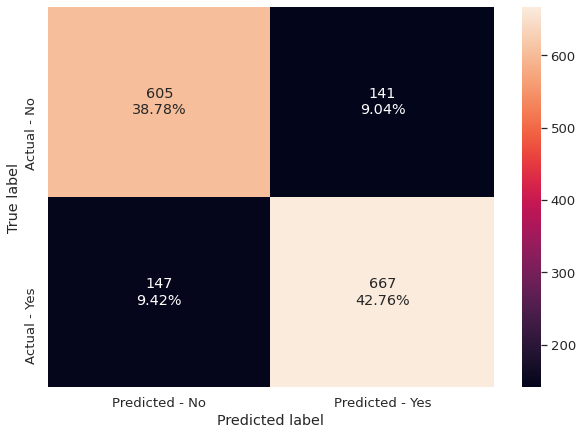

In [ ]:
#confisuon_matrix_summary_ridge(y_test, ridge)
make_confusion_matrix(ridge,y_test)

In [ ]:
models_Metrics.append(get_metrics_scores(ridge, title='Ridge classifer()alpha =0'))

Accuracy on training set :  0.830910645575032
Accuracy on test set :  0.8153846153846154
Recall on training set :  0.8413934426229508
Recall on test set :  0.8194103194103194
Precision on training set :  0.8355718355718356
Precision on test set :  0.8254950495049505
F1 on training set :  0.8384725342046151
F1 on test set :  0.8224414303329223


In [ ]:
##  Function to calculate our parameters score
def get_metrics_scores_2(model, X_train, y_train, flag=True, title='Model Title'):
    '''
    model : classifier to predict values of X, 

    '''
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    ## add metrics to list
    a = [title, 
         metrics.accuracy_score(y_train, pred_train), metrics.accuracy_score(y_test, pred_test), 
         metrics.recall_score(y_train,pred_train), metrics.recall_score(y_test,pred_test), 
         metrics.precision_score(y_train,pred_train), metrics.precision_score(y_test,pred_test), 
         metrics.f1_score(y_train,pred_train), metrics.f1_score(y_test,pred_test)
        ]
    
    
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ", a[1])
        print("Accuracy on test set : ", a[2])
        
        print("Recall on training set : ", a[3])
        print("Recall on test set : ", a[4])
        
        print("Precision on training set : ", a[5])
        print("Precision on test set : ", a[6])
        
        print("F1 on training set : ", a[7])
        print("F1 on test set : ", a[8])
    
    return a # returning the list with train and test scores

### **IMBLearn Random Under Sampling**

In [ ]:
# set x and y
X =df_ub.drop('Status', axis = 1)
y = df_ub['Status']


# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
y_train.value_counts()

0    4476
1    1220
Name: Status, dtype: int64

In [ ]:
X_train.shape

(5696, 25)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)  #To capture the recors left out

In [ ]:
y_rus.shape

(2440,)

In [ ]:
logreg_US = LogisticRegression()

# fit model
logreg_US.fit(X_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

models_Metrics.append(get_metrics_scores_2(logreg_US,X_rus, y_rus, title='Logistic regression Undersampling'))


Accuracy on training set :  0.8254098360655737
Accuracy on test set :  0.8283307003686151
Recall on training set :  0.8204918032786885
Recall on test set :  0.8525798525798526
Precision on training set :  0.8286423841059603
Precision on test set :  0.566068515497553
F1 on training set :  0.8245469522240527
F1 on test set :  0.6803921568627451


### Build Decision Tree Model

In [186]:
model_DTC = DecisionTreeClassifier(criterion='gini', random_state=1)# we can pass a dictionary {0:0.81,1:0.19} to the model to specify the weight of each class and the decision tree will give more weightage to class 1
model_DTC.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

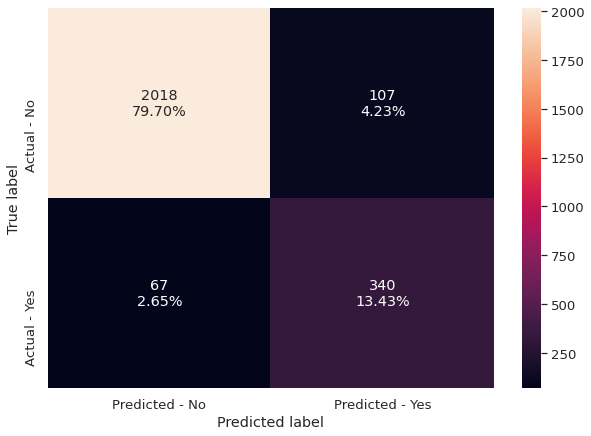

In [187]:
make_confusion_matrix(model_DTC,y_test)

In [188]:

models_Metrics.append(get_metrics_scores_2(model_DTC,X_train_res, y_train_res, title='Decision Tree (balanced)'))


Accuracy on training set :  1.0
Accuracy on test set :  0.9312796208530806
Recall on training set :  1.0
Recall on test set :  0.8353808353808354
Precision on training set :  1.0
Precision on test set :  0.7606263982102909
F1 on training set :  1.0
F1 on test set :  0.7962529274004685


## Bagging Classifier

In [ ]:

model_Bagging = BaggingClassifier(random_state=1)
model_Bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

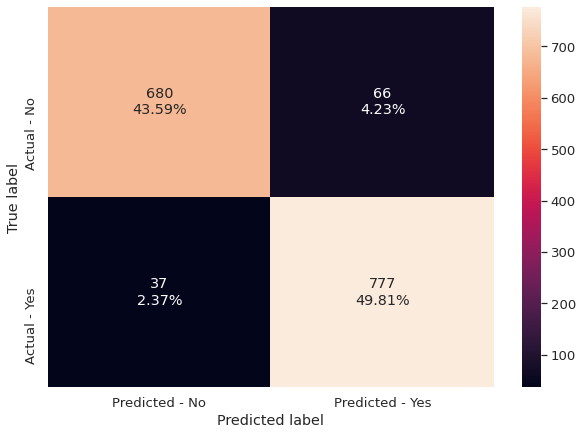

In [ ]:
make_confusion_matrix(model_Bagging, y_test)

In [ ]:
models_Metrics.append(get_metrics_scores(model_Bagging, title='Bagging (default parameters)'))

Accuracy on training set :  0.9965797349294571
Accuracy on test set :  0.933974358974359
Recall on training set :  0.9963114754098361
Recall on test set :  0.9545454545454546
Precision on training set :  0.9971287940935193
Precision on test set :  0.9217081850533808
F1 on training set :  0.996719967199672
F1 on test set :  0.9378394689197345


## Random Forest

In [189]:
model_RandomForest = RandomForestClassifier(random_state=1)
model_RandomForest.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

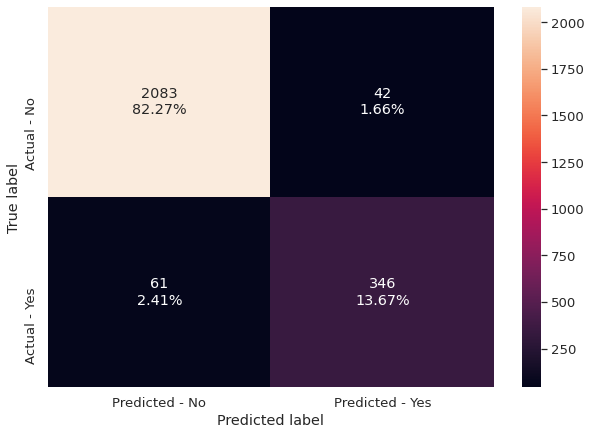

In [190]:
make_confusion_matrix(model_RandomForest, y_test)

In [192]:
models_Metrics.append(get_metrics_scores_2(model_RandomForest,X_train_res, y_train_res, title='Randome Forest (balanced smote)'))

Accuracy on training set :  1.0
Accuracy on test set :  0.9593206951026856
Recall on training set :  1.0
Recall on test set :  0.8501228501228502
Precision on training set :  1.0
Precision on test set :  0.8917525773195877
F1 on training set :  1.0
F1 on test set :  0.8704402515723271


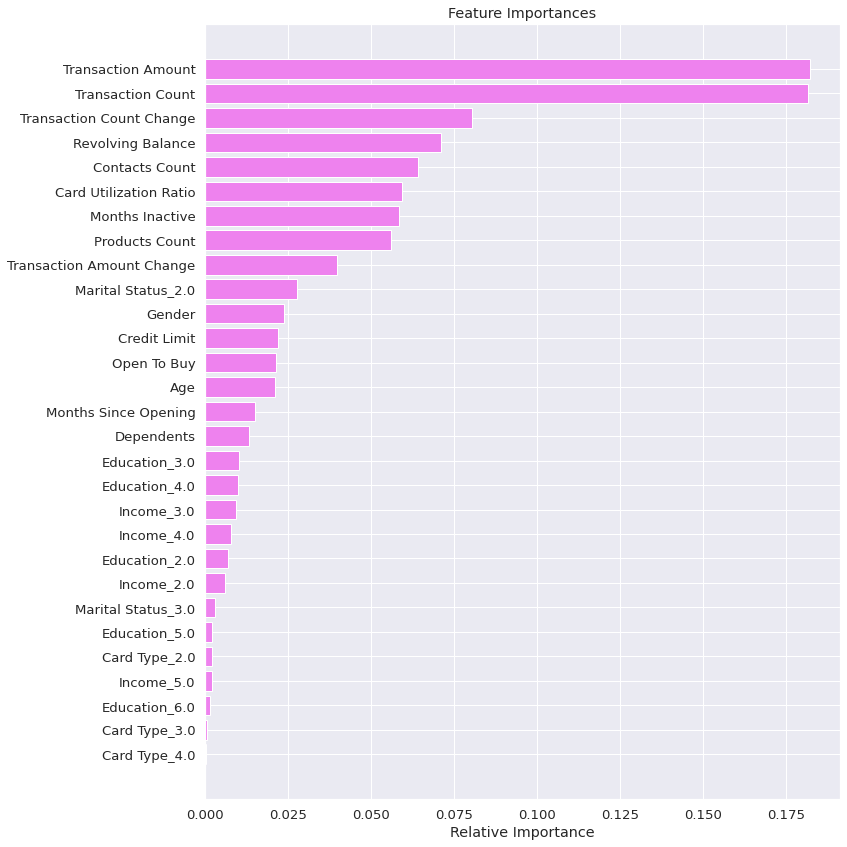

In [193]:
importances = model_RandomForest.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('randomfimportance.png')
plt.show()

## Ada Boost CLassifer

In [194]:
model_Ada = AdaBoostClassifier(random_state=1)
model_Ada.fit(X_train_res, y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

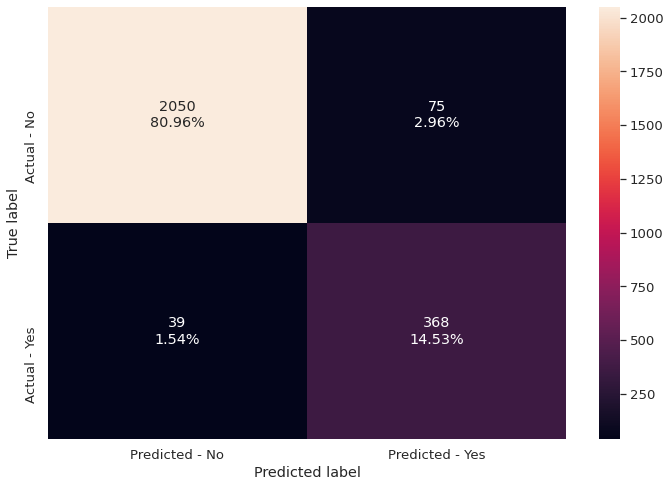

In [195]:
make_confusion_matrix(model_Ada, y_test)

In [197]:
models_Metrics.append(get_metrics_scores_2(model_Ada,X_train_res, y_train_res, title='AdaBoost (Balanced)'))

Accuracy on training set :  0.9687058823529412
Accuracy on test set :  0.9549763033175356
Recall on training set :  0.9712941176470589
Recall on test set :  0.9041769041769042
Precision on training set :  0.9662921348314607
Precision on test set :  0.8306997742663657
F1 on training set :  0.9687866697958227
F1 on test set :  0.8658823529411764


## Gradient Boost

In [198]:
model_Gradient = GradientBoostingClassifier(random_state=1)
model_Gradient.fit(X_train_res, y_train_res)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

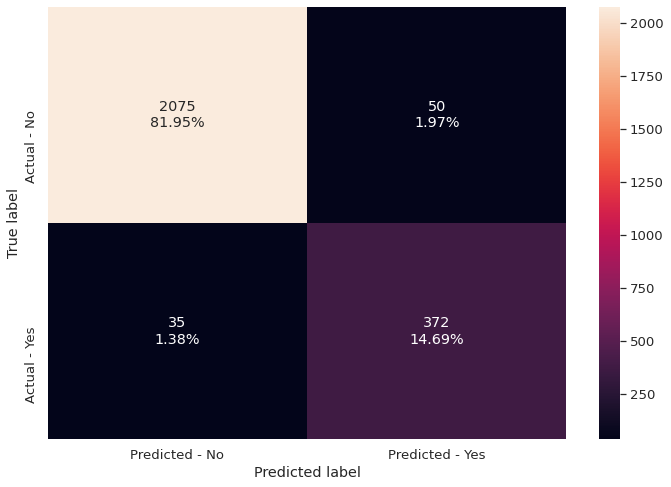

In [199]:
make_confusion_matrix(model_Gradient, y_test)

In [200]:
models_Metrics.append(get_metrics_scores_2(model_Gradient,X_train_res, y_train_res, title='Gradient Boost'))

Accuracy on training set :  0.9825098039215686
Accuracy on test set :  0.9664296998420221
Recall on training set :  0.9821176470588235
Recall on test set :  0.914004914004914
Precision on training set :  0.9828885400313971
Precision on test set :  0.8815165876777251
F1 on training set :  0.9825029423303256
F1 on test set :  0.8974668275030158


## XG Boost

In [205]:
model_XGBoost = XGBClassifier(random_state=1, eval_metric='logloss')
model_XGBoost.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [206]:
make_confusion_matrix(model_XGBoost, y_test)

ValueError: ignored

In [207]:
models_Metrics.append(get_metrics_scores_2(model_XGBoost,X_train_res, y_train_res, title='XGBoost'))

ValueError: ignored

## Comparing the models so far

In [208]:
dfTitles = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall', 'Train Precision', 'Test Precision', 'Train F1', 'Test F1']

comparison_frame = pd.DataFrame(models_Metrics, columns=dfTitles)
comparison_frame

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic regression SMote,0.807451,0.798973,0.802196,0.759214,0.810717,0.429167,0.806434,0.548358
1,Logistic Regression (default parameters),0.888348,0.898499,0.522951,0.542998,0.705752,0.756849,0.600753,0.632332
2,Logistic Regression (Tuned_unbalanced),0.904279,0.907583,0.583607,0.597052,0.764769,0.776358,0.662018,0.675000
3,Decision Tree (balanced),1.000000,0.931280,1.000000,0.835381,1.000000,0.760626,1.000000,0.796253
4,Randome Forest (balanced smote),1.000000,0.959321,1.000000,0.850123,1.000000,0.891753,1.000000,0.870440
5,AdaBoost (Balanced),0.968706,0.954976,0.971294,0.904177,0.966292,0.830700,0.968787,0.865882
6,Gradient Boost,0.982510,0.966430,0.982118,0.914005,0.982889,0.881517,0.982503,0.897467


## TUNING THE MODELS

### Random Froest(Tuned)

In [214]:
from sklearn.model_selection import StratifiedKFold

In [215]:
n_estimators = [100, 200, 300]
max_depth = [5, 10,  25]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10]
#ccp_alpha = [0, 0.01, 0.1, 1]

hyperF = dict(n_estimators = n_estimators, 
              max_depth = max_depth, 
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)
             # ccp_alpha = ccp_alpha)

grid_search = GridSearchCV(RandomForestClassifier(), 
                           hyperF, 
                           cv=StratifiedKFold(5, random_state=10, shuffle=True),
                           scoring=metrics.make_scorer(metrics.recall_score),
                           verbose = 3, 
                           n_jobs = -1)

grid_search.fit(X, y)
grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 13.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [216]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [304]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Train the model using the training sets 
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [306]:
 y_test.shape

(2532,)

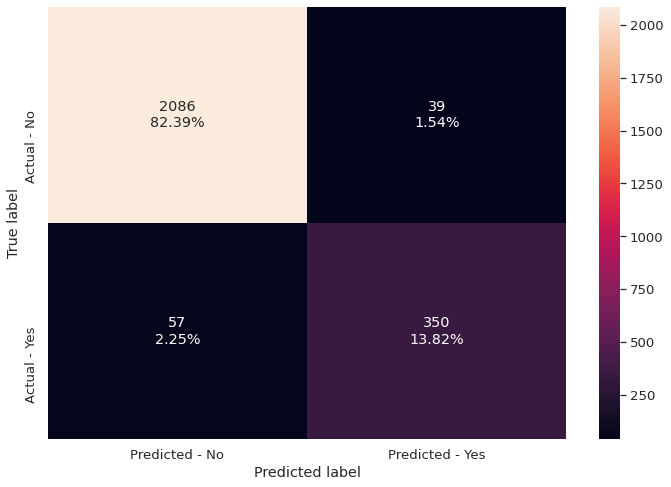

In [305]:
make_confusion_matrix(rfc, y_test)

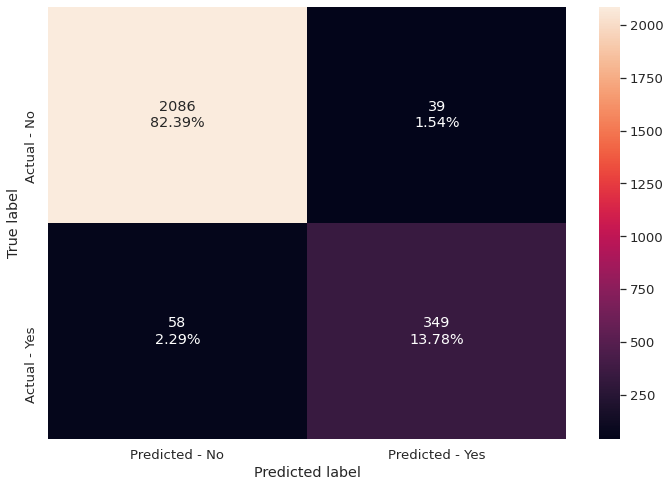

In [218]:
make_confusion_matrix(rfc, y_test)

In [307]:
get_metrics_scores_2(rfc, X_train_res,y_train_res, title='Random forest Classifer Tuned')

Accuracy on training set :  0.9995294117647059
Accuracy on test set :  0.9620853080568721
Recall on training set :  1.0
Recall on test set :  0.85995085995086
Precision on training set :  0.999059708509638
Precision on test set :  0.8997429305912596
F1 on training set :  0.9995296331138288
F1 on test set :  0.8793969849246231


['Random forest Classifer Tuned',
 0.9995294117647059,
 0.9620853080568721,
 1.0,
 0.85995085995086,
 0.999059708509638,
 0.8997429305912596,
 0.9995296331138288,
 0.8793969849246231]

### ADA boost tuned

In [224]:
from sklearn.pipeline import Pipeline
>>> from sklearn.pipeline import make_pipeline

In [225]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train_res,y_train_res)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'), 'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__n_estimators': 70} 
Score: 0.9518431372549019
CPU times: user 23min 56s, sys: 4.9 s, total: 24min 1s
Wall time: 23min 55s


In [228]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'),
        n_estimators=70,
        learning_rate=0.01,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train_res, y_train_res)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=3,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                      

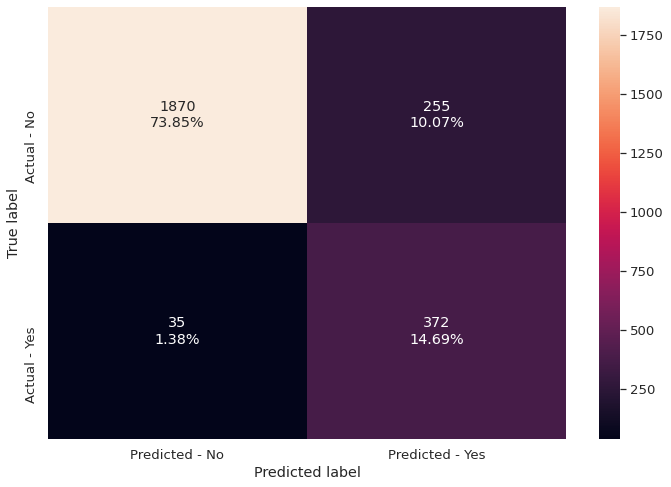

In [229]:


# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

In [231]:
models_Metrics.append(get_metrics_scores_2(abc_tuned1,X_train_res, y_train_res, title='Ada boost  Tuned'))

Accuracy on training set :  0.9265098039215687
Accuracy on test set :  0.8854660347551343
Recall on training set :  0.9647058823529412
Recall on test set :  0.914004914004914
Precision on training set :  0.8962401632177208
Precision on test set :  0.5933014354066986
F1 on training set :  0.9292135680290096
F1 on test set :  0.7195357833655706


Tunning with RandomizedSearchCV



In [232]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [233]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train_res, y_train_res)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')} with CV score=0.9499607843137255:
CPU times: user 8min 25s, sys: 1.68 s, total: 8min 27s
Wall time: 8min 25s


In [234]:
# Creating new pipeline with best parameters
abc_tuned3 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best'),
        n_estimators=90,
        learning_rate=0.01,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned3.fit(X_train_res, y_train_res)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=3,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_split=None,
                      

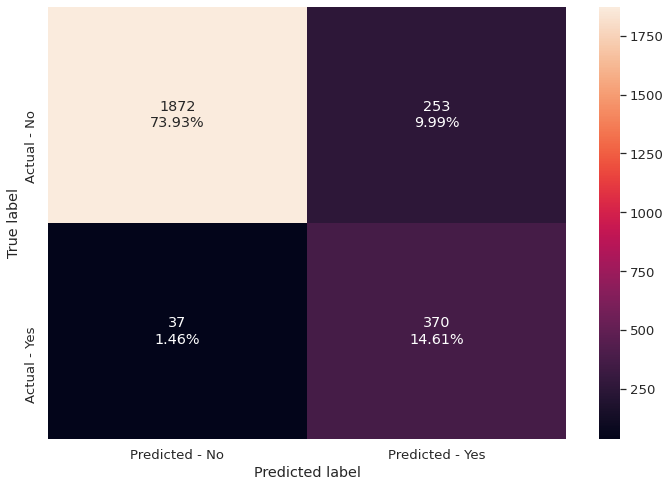

In [235]:

# Creating confusion matrix
make_confusion_matrix(abc_tuned3, y_test)

In [236]:
models_Metrics.append(get_metrics_scores_2(abc_tuned3,X_train_res, y_train_res, title='Ada boost  Tuned (RandomgridCV)'))

Accuracy on training set :  0.9277647058823529
Accuracy on test set :  0.8854660347551343
Recall on training set :  0.9642352941176471
Recall on test set :  0.9090909090909091
Precision on training set :  0.8986842105263158
Precision on test set :  0.593900481540931
F1 on training set :  0.9303064699205448
F1 on test set :  0.7184466019417477


## XG boost tuned

Using Randomseach CV

In [238]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_res,y_train_res)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 5} with CV score=0.999529411764706:
CPU times: user 10min 35s, sys: 1.72 s, total: 10min 37s
Wall time: 10min 35s


In [319]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.8,
                learning_rate= 0.05,
                 max_depth = 2, reg_lambda = 10
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train_res, y_train_res)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=5, learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=10, scale_pos_weight=10,
                               seed=None, silent=None, subsample=0.8,
                               verbosity=1))],
         verbose=False)

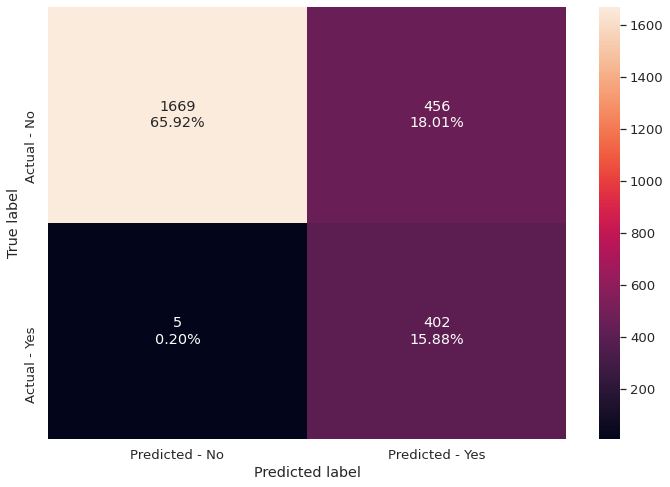

In [320]:


# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

In [241]:
models_Metrics.append(get_metrics_scores_2(xgb_tuned2,X_train_res, y_train_res, title='XG boost  Tuned(RSCV)'))

Accuracy on training set :  0.899921568627451
Accuracy on test set :  0.8179304897314376
Recall on training set :  0.9984313725490196
Recall on test set :  0.9877149877149877
Precision on training set :  0.8340977591403486
Precision on test set :  0.46853146853146854
F1 on training set :  0.9088961873482793
F1 on test set :  0.6355731225296442


## ALL the models

In [242]:
dfTitles = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall', 'Train Precision', 'Test Precision', 'Train F1', 'Test F1']

comparison_frame = pd.DataFrame(models_Metrics, columns=dfTitles)
comparison_frame

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Logistic regression SMote,0.807451,0.798973,0.802196,0.759214,0.810717,0.429167,0.806434,0.548358
1,Logistic Regression (default parameters),0.888348,0.898499,0.522951,0.542998,0.705752,0.756849,0.600753,0.632332
2,Logistic Regression (Tuned_unbalanced),0.904279,0.907583,0.583607,0.597052,0.764769,0.776358,0.662018,0.675000
3,Decision Tree (balanced),1.000000,0.931280,1.000000,0.835381,1.000000,0.760626,1.000000,0.796253
4,Randome Forest (balanced smote),1.000000,0.959321,1.000000,0.850123,1.000000,0.891753,1.000000,0.870440
5,AdaBoost (Balanced),0.968706,0.954976,0.971294,0.904177,0.966292,0.830700,0.968787,0.865882
6,Gradient Boost,0.982510,0.966430,0.982118,0.914005,0.982889,0.881517,0.982503,0.897467
7,Random forest Classifer Tuned,0.999608,0.961690,0.999843,0.857494,0.999373,0.899485,0.999608,0.877987
8,Ada boost Tuned,0.926510,0.885466,0.964706,0.914005,0.896240,0.593301,0.929214,0.719536
9,Ada boost Tuned (RandomgridCV),0.927765,0.885466,0.964235,0.909091,0.898684,0.593900,0.930306,0.718447
